<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/levelup.png' width=240/></center>

# 과제: 고객 신용도 예측


<img src = "https://github.com/Jangrae/img/blob/master/credit-card.jpg?raw=true" width=900 align="left"/>

# 실습 안내

**1) 실습 방법**

- 데이터 전처리와 탐색 보다는 모델 코딩에 중점을 둡니다.
- 기존 소스에서 복사해 붙여넣기 하지 않고 다시 코딩합니다.
- 실습 후 시간이 남으면 데이터 탐색과 성능 튜닝을 진행합니다. 
- 모든 코드 셀에는 주석을 충분히 답니다.
- 마크다운 셀을 사용해 작업 한 내용을 충분히 설명합니다.
- 입력을 요구한 (의견) 부분을 충분히 채웁니다.

**2) 실습 내용**

- 대상 데이터를 읽어와 탐색하며 이해합니다.
- 결측치를 확인하고 처리합니다.
- 다양한 방법으로 데이터를 탐색하고 결과를 정리합니다.
- 범주형 변수를 구분하고 가변수화를 진행합니다.
- 연속형 변수를 구분하고 정규화를 진행합니다.
- 데이터를 학습용 데이터와 평가용 데이터로 분리합니다.
- 다양한 머신러닝 알고리즘을 사용해 모델링합니다.
- 성능 평가 결과를 이해하고 설명합니다.
- 더 나은 성능을 보이도록 특정 모델을 튜닝합니다.

**3) 데이터 정보**

<img src = "https://github.com/Jangrae/img/blob/master/credit.png?raw=true" width=550 align="left"/>

Creditability / 신용 / 1 = 신용 좋음, 0 = 신용 없음

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/credit_NA.csv'
path = 'https://bit.ly/CreditFile'
data = pd.read_csv(path)

# 2.데이터 이해

- 다양한 탐색 및 분석 방법을 사용해 대상 데이터를 충분히 이해합니다.

In [3]:
# 폰트 불러오기
import matplotlib as mpl

print(mpl.matplotlib_fname())
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['font.size'] = 18

E:\anaconda\lib\site-packages\matplotlib\mpl-data\matplotlibrc


## 2.1.기본 정보 확인

- 데이터에 대한 기본 정보를 우선 확인합니다.

**1) 상/하위 데이터 확인**

- 데이터 앞/뒤를 살펴 데이터를 간단히 확인합니다.

In [4]:
data.head(5)


,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
0,1,3,24,2,0,1249,2,4,2,1,28.0,2,1,3,1,1
1,1,2,9,2,0,276,3,4,4,1,22.0,1,1,2,1,1
2,1,1,18,4,2,1049,2,2,4,2,21.0,1,1,3,1,1
3,1,1,24,4,1,6419,5,2,4,4,NaN,3,2,4,2,1
4,1,3,12,2,2,1424,5,2,4,1,55.0,2,1,4,2,1


In [5]:

data.tail(5)

,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
995,1,1,12,2,3,1680,5,4,1,1,35.0,2,1,3,1,1
996,1,1,42,2,2,7882,4,3,4,2,45.0,3,1,3,1,1
997,0,2,54,0,9,15945,2,3,4,4,58.0,1,1,3,2,1
998,1,2,15,4,3,1537,5,3,4,1,50.0,2,2,3,2,1
999,0,3,12,2,0,1386,3,2,2,2,26.0,2,1,3,1,1


**2) 변수 정보 확인**

- 변수 이름, 값 개수, 데이터 형식등을 확인합니다.

In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Creditability   1000 non-null   int64  
 1   AccountBalance  1000 non-null   int64  
 2   CreditDuration  1000 non-null   int64  
 3   Payment         1000 non-null   int64  
 4   Purpose         1000 non-null   int64  
 5   CreditAmount    1000 non-null   int64  
 6   Employment      1000 non-null   int64  
 7   SexMarital      1000 non-null   int64  
 8   CurrentAddress  1000 non-null   int64  
 9   MostValuable    1000 non-null   int64  
 10  Age             983 non-null    float64
 11  ApartmentType   1000 non-null   int64  
 12  NoCredits       1000 non-null   int64  
 13  Occupation      1000 non-null   int64  
 14  Telephone       1000 non-null   int64  
 15  ForeignWorker   1000 non-null   int64  
dtypes: float64(1), int64(15)
memory usage: 125.1 KB


- Age 변수에 결측치 17개 확인.

**3) 기초통계정보 확인**

- 기초통계정보를 통해 숫자 데이터를 갖는 변수들 값 분포를 확인합니다.

In [7]:
data.describe()


,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,983.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.183000,20.903000,2.54500,2.828000,3271.24800,3.384000,2.68200,2.845000,2.358000,35.495422,1.928000,1.407000,2.904000,1.404000,1.037000
std,0.458487,0.835589,12.058814,1.08312,2.744439,2822.75176,1.208306,0.70808,1.103718,1.050209,11.302980,0.530186,0.577654,0.653614,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,3.000000,2.00000,2.000000,1.000000,27.000000,2.000000,1.000000,3.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,3.000000,3.00000,3.000000,2.000000,33.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,3.000000,24.000000,4.00000,3.000000,3972.25000,5.000000,3.00000,4.000000,3.000000,42.000000,2.000000,2.000000,3.000000,2.000000,1.000000
max,1.000000,3.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,4.00000,4.000000,4.000000,75.000000,3.000000,4.000000,4.000000,2.000000,2.000000


**4) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [8]:
data.isna().sum()


Creditability      0
AccountBalance     0
CreditDuration     0
Payment            0
Purpose            0
CreditAmount       0
Employment         0
SexMarital         0
CurrentAddress     0
MostValuable       0
Age               17
ApartmentType      0
NoCredits          0
Occupation         0
Telephone          0
ForeignWorker      0
dtype: int64

## 2.2.데이터 상세 확인(5가지 이상 추가)

- 데이터를 **충분히 이해할 수 있도록** 집계와 시각화를 통해 살펴봅니다.
- 이후 모델링을 진행해야 하니 분석에 너무 많은 시간을 할애해서는 안됩니다.
- 분석 결과를 관련 코드 셀 아래에 정리합니다.

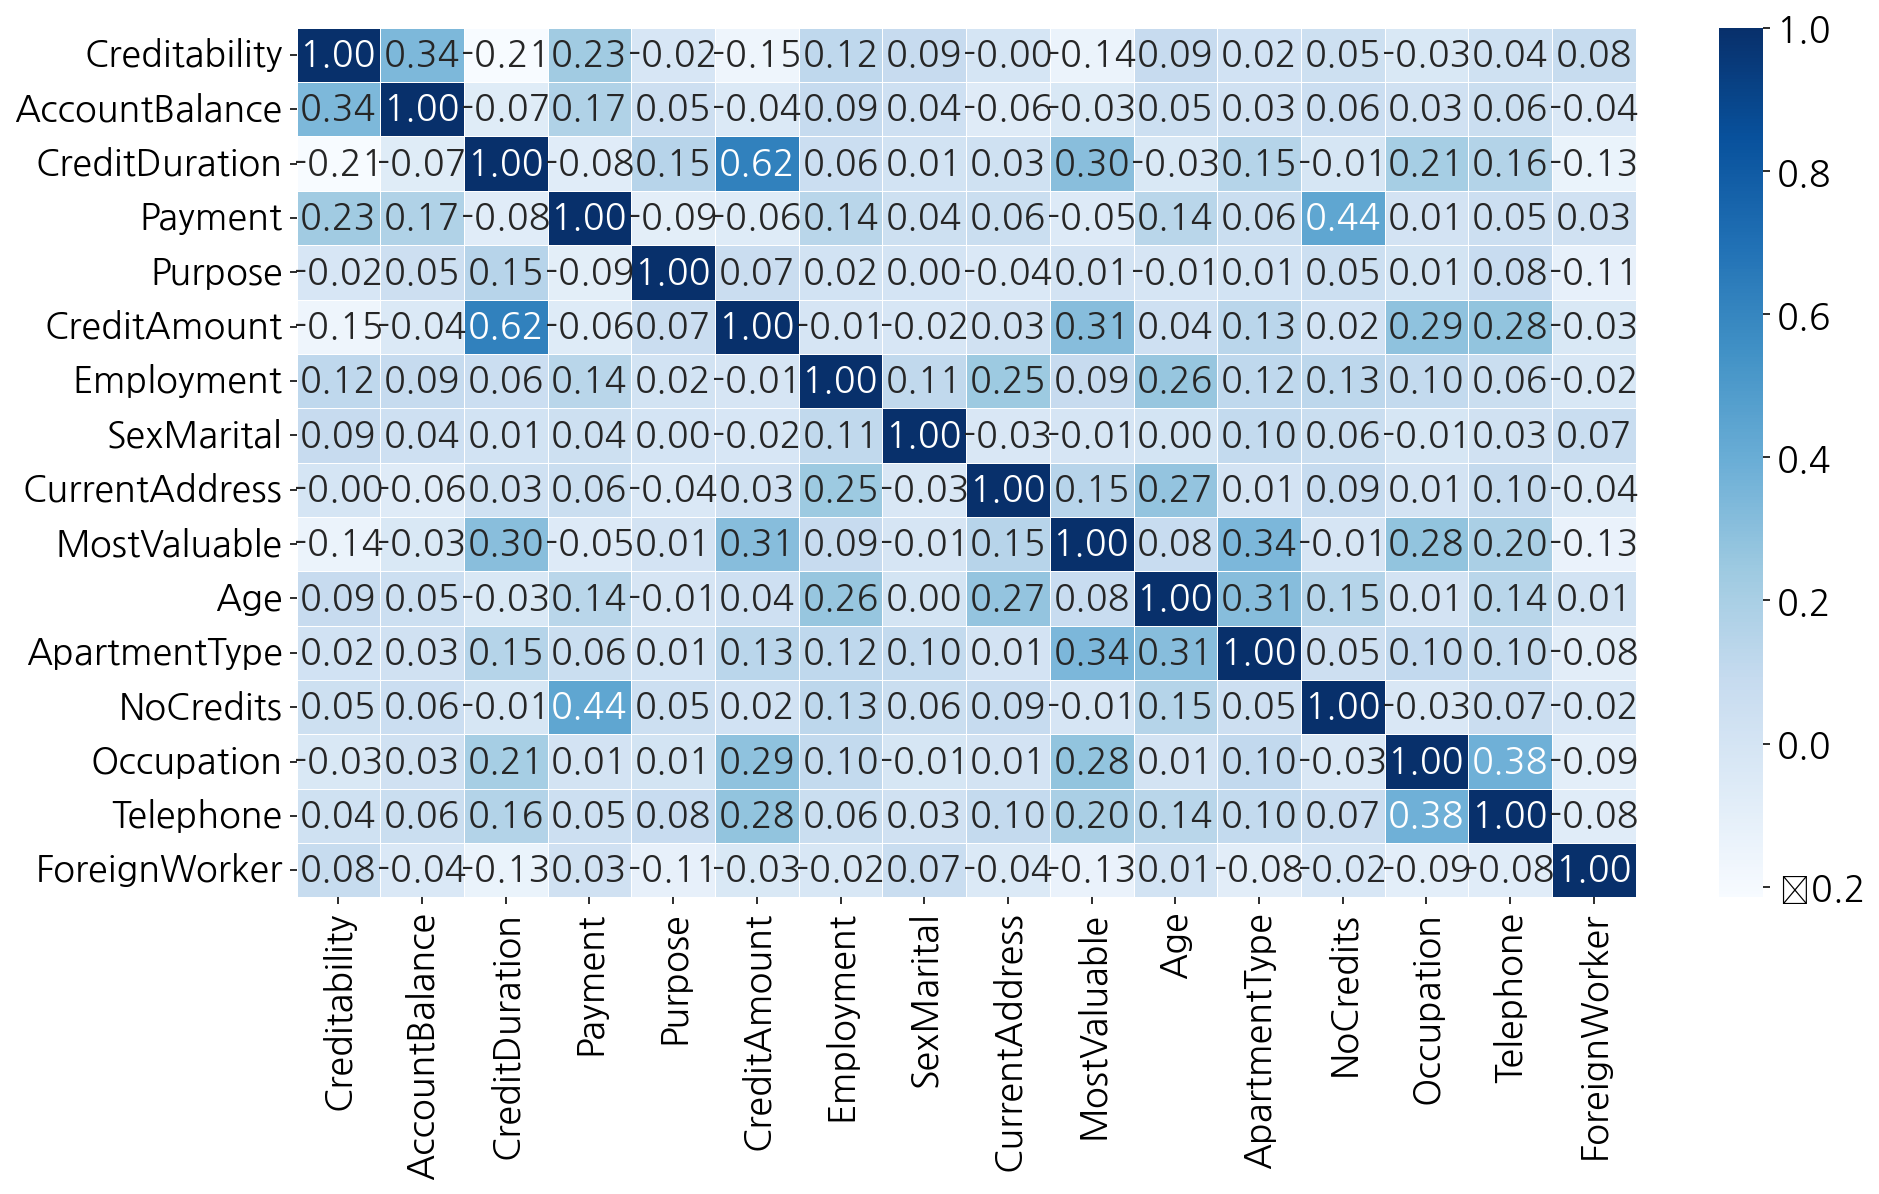

In [9]:
# 가변수 전 상관관계 시각화
plt.figure(figsize=(15, 8))
sns.heatmap(data = data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

### 잔고상태 좋음(0.34) > 과거 대출기록(0.23) > 직장 근무기간(0.12) 순서로 높았음.
#### 추후에 가변수화한 상관관계로 분석 

**1) Target 값 분포 확인**

- Target 변수인 Creditability 변수의 값 분포를 확인합니다.

In [10]:
target = 'Creditability'

In [11]:
data[target].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [12]:
target = 'Creditability'

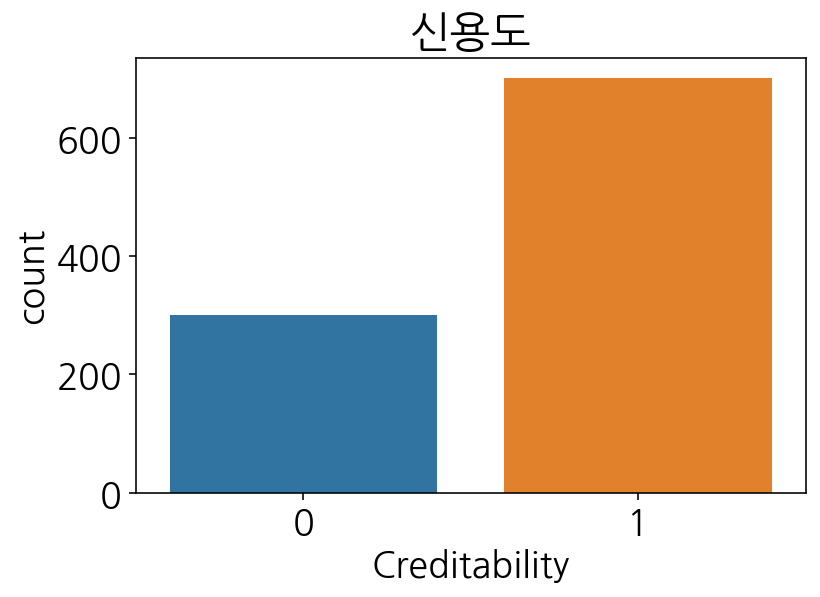

In [13]:
sns.countplot(data=data, x=target)
plt.title('신용도')
plt.show()

- (의견) 신용 있는 고객의 수가 신용이 없는 고객보다 2배이상 많음.
- (의견) 하지만 비대칭

**2) 변수 구분**

- Target 변수(Creditability)를 제외한 변수를 범주형과 연속형으로 구분해 목륵을 정리합니다.
- 목록 개수는 필요한 만큼 늘려 사용합니다.

- 범주형 변수 (가변수화 대상)
    -  AccountBalance
    -  Payment
    -  Purpose
    -  Employment
    -  SexMarital
    -  CurrentAddress
    -  MostValuable
    -  ApartmentType
    -  NoCredits
    -  Occupation
    -  Telephone
    -  Creditability

- 연속형 변수 (정규화 대상)
    -  CreditDuration
    -  CreditAmount
    -  Age
    - 
    - 

**3) 범주형 변수 확인**

- Target 변수(Creditability)를 제외한 범주형 변수의 범주값과 그 값의 개수를 확인합니다.
- 참고: 대상 변수를 리스트로 선언하고 반복문을 수행해 확인하면 편리합니다.

In [14]:
cols = [target,'AccountBalance','Payment','Purpose','Employment','SexMarital','CurrentAddress','MostValuable','ApartmentType','NoCredits','Occupation','Telephone']
for i in cols:
    print(data[i].value_counts())
    print('='*60)

1    700
0    300
Name: Creditability, dtype: int64
3    457
1    274
2    269
Name: AccountBalance, dtype: int64
2    530
4    293
3     88
1     49
0     40
Name: Payment, dtype: int64
3     280
0     234
2     181
1     103
9      97
6      50
5      22
4      12
10     12
8       9
Name: Purpose, dtype: int64
3    339
5    253
4    174
2    172
1     62
Name: Employment, dtype: int64
3    548
2    310
4     92
1     50
Name: SexMarital, dtype: int64
4    413
2    308
3    149
1    130
Name: CurrentAddress, dtype: int64
3    332
1    282
2    232
4    154
Name: MostValuable, dtype: int64
2    714
1    179
3    107
Name: ApartmentType, dtype: int64
1    633
2    333
3     28
4      6
Name: NoCredits, dtype: int64
3    630
2    200
4    148
1     22
Name: Occupation, dtype: int64
1    596
2    404
Name: Telephone, dtype: int64


In [15]:
data['NoCredits'].value_counts()

1    633
2    333
3     28
4      6
Name: NoCredits, dtype: int64

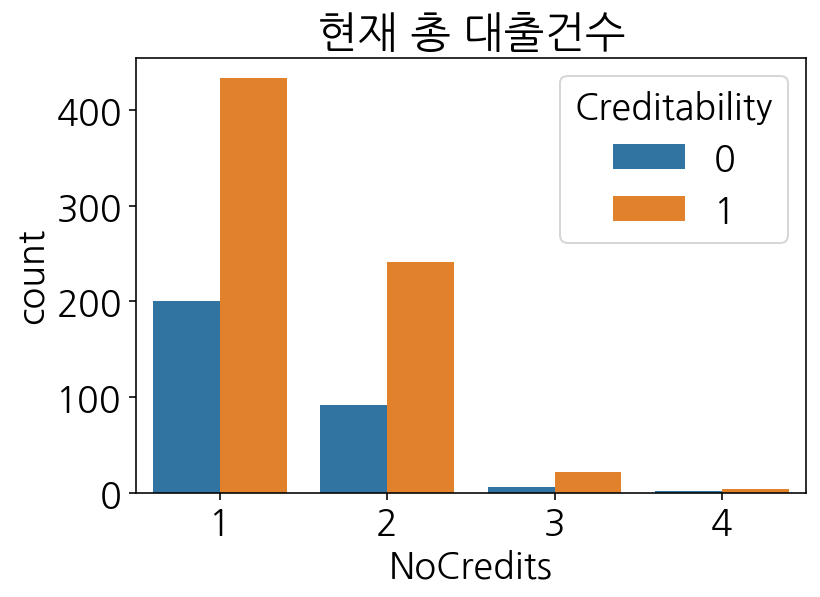

In [16]:
sns.countplot(data=data,x='NoCredits',hue=target)
plt.title('현재 총 대출건수')
plt.show()

- (의견) 타겟과 같이 비교해본결과 대출 건수가 적을수록 신용이 높은 결과가 나옴.
- (의견) 

**4) 추가**

- 대출목적 조사

In [17]:
# 범주값 확인
data['Purpose'].value_counts()

3     280
0     234
2     181
1     103
9      97
6      50
5      22
4      12
10     12
8       9
Name: Purpose, dtype: int64

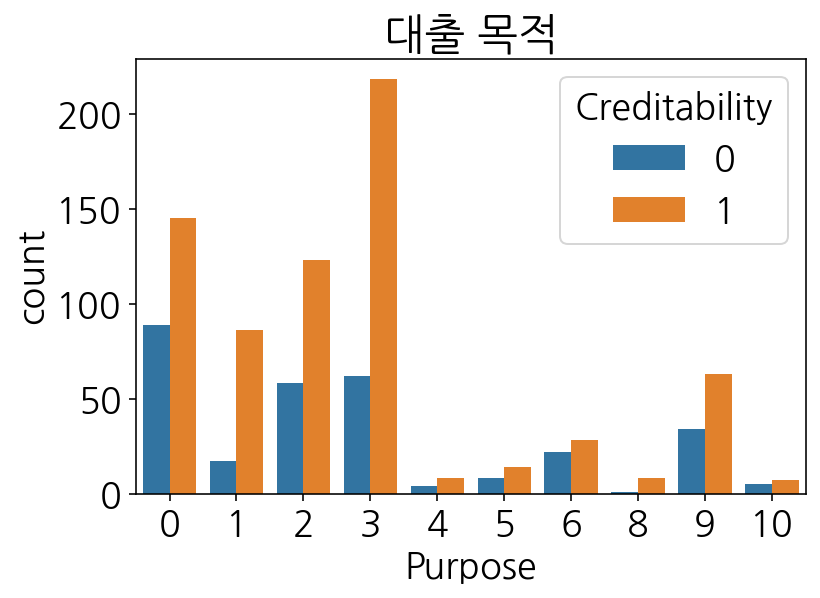

In [18]:
sns.countplot(data=data, x='Purpose',hue=target)
plt.title('대출 목적')
plt.show()

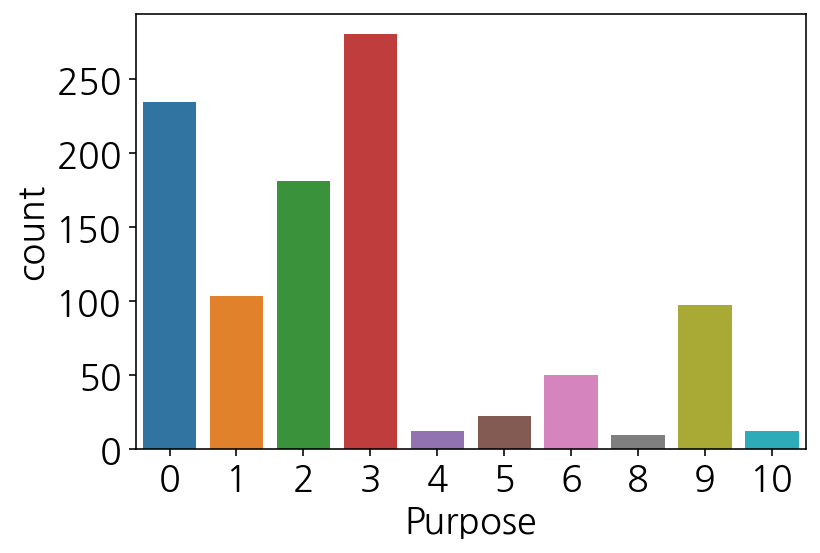

In [19]:
sns.countplot(data=data,x='Purpose')
plt.show()

- (의견) 가구를 사기위한 목적의 경우 신용도가 높게 유지됨.
- (의견) 가구 > 기타 사용 > 중고차 대출 순서로 이용이 많음.

**5) 추가**

- 직업 조사.

In [20]:
data['Occupation'].value_counts()



3    630
2    200
4    148
1     22
Name: Occupation, dtype: int64

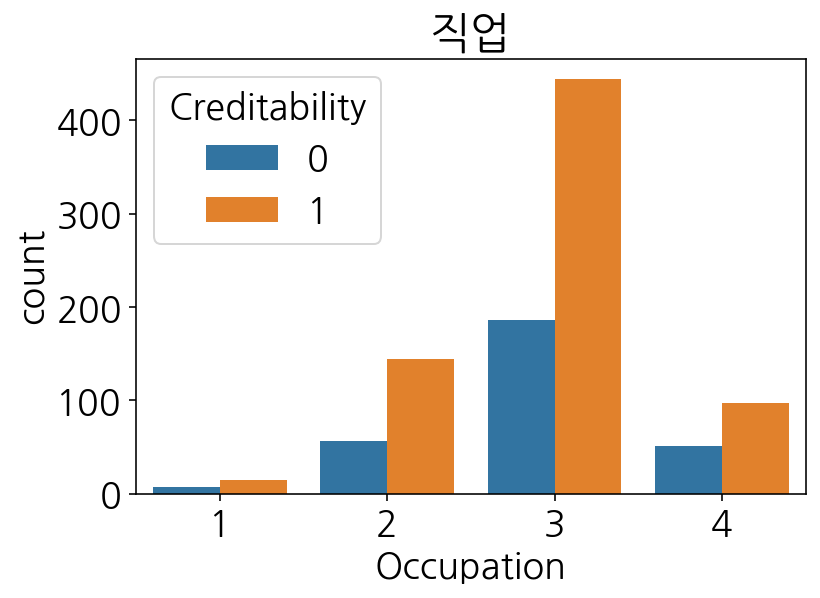

In [21]:
sns.countplot(data=data,x='Occupation',hue=target)
plt.title('직업')
plt.show()

**6) 추가**

- 주거환경 조사

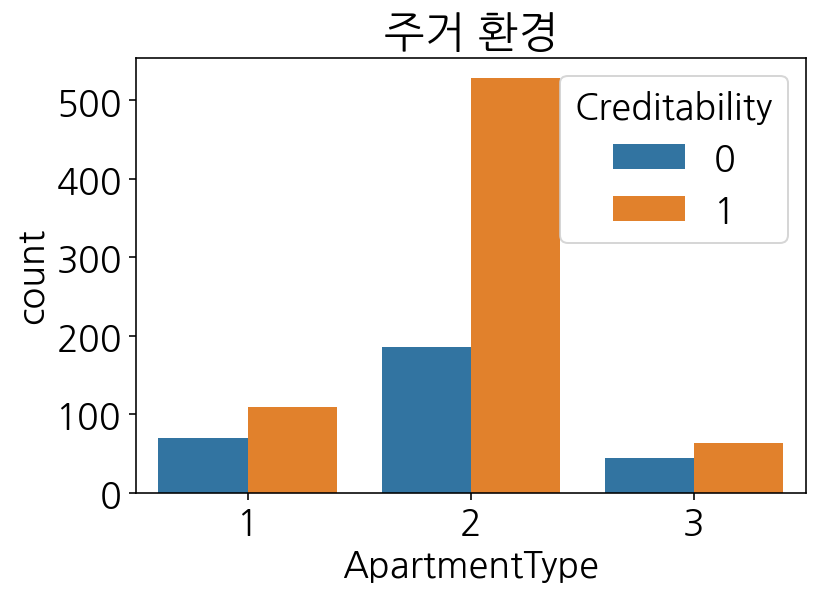

In [22]:
sns.countplot(data=data,x='ApartmentType',hue=target)
plt.title('주거 환경')
plt.show()

- (의견) 렌탈 아파트의 비용이 높으며, 신용도도 잘 유지되는 것으로 보임.
- (의견) 예상과는 다르게 상대적으로 경제적 여유가 있어보이는 소유자들의 경우 신용도가 좋지 못함.

**7) 추가**

- 연속형 데이터인 연령대 조사.

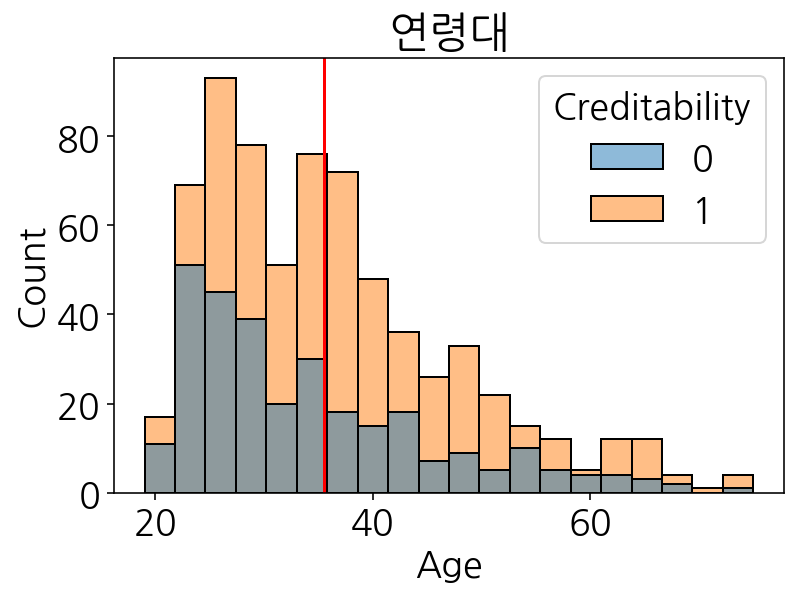

In [23]:
sns.histplot(data=data,x='Age',hue=target,bins=20)
plt.axvline(data['Age'].mean(),color='r')
plt.title('연령대')
plt.show()


- (의견) 사회 구성원이 되는 20후반부터 신용도가 높아지다 나이가 들수록 신용도가 떨어지는 모습.
- (의견) 사회적 안정이 되는 고연령대에 오히려 신용도가 떨어지는 모습.
- (의견) 해고, 퇴직 등과 같은 이유로 불안정해진 경제적 사정이 있지 않을까?

**8) 추가**

- 연속형 데이터인 신청한 대출 금액 조사

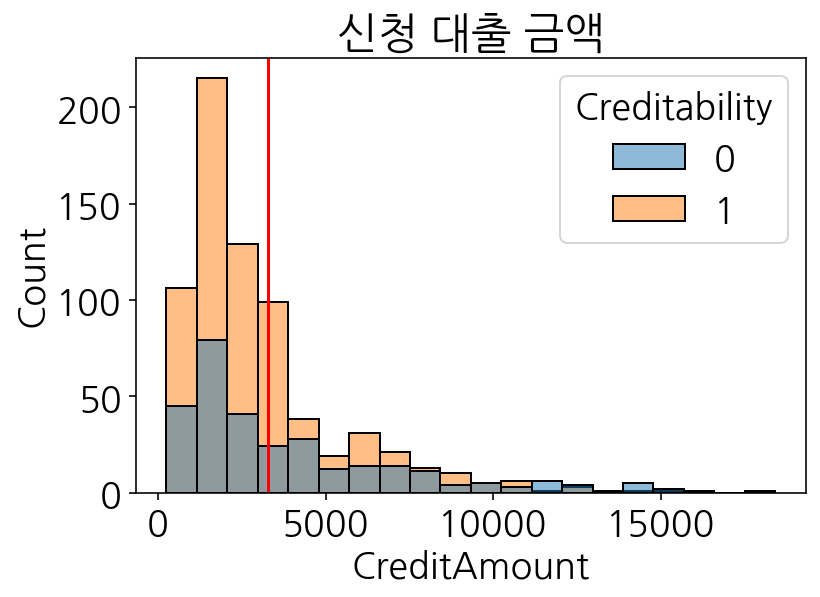

In [24]:
sns.histplot(data=data,x='CreditAmount',hue=target, bins=20)
plt.axvline(data['CreditAmount'].mean(),color='r')
plt.title('신청 대출 금액')
plt.show()

- (의견) 대출금액이 높아질수록 신용도가 떨어지는 모습 확인 가능.
- (의견) 아예 1.1만달러 이후로는 신용불량이 신용 양호보다 높은 부분도 보임.

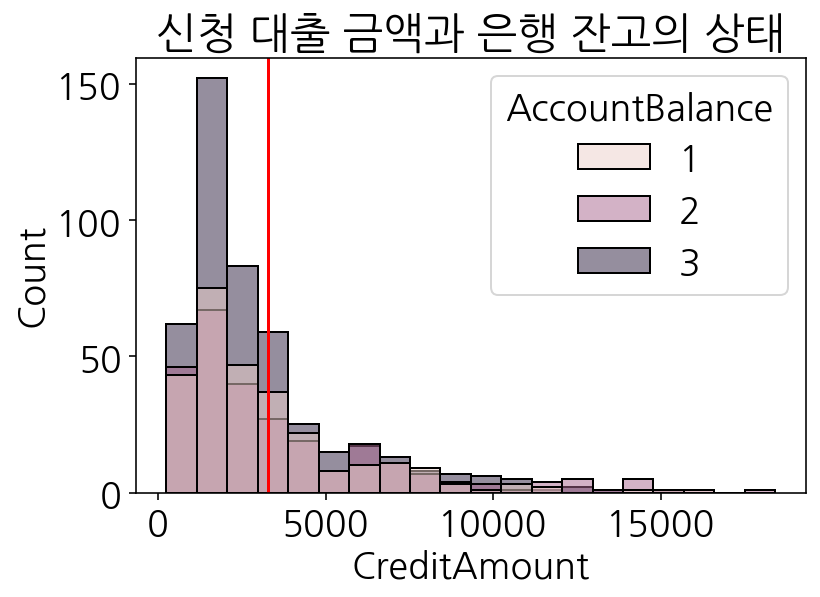

In [25]:
sns.histplot(data=data,x='CreditAmount',hue='AccountBalance',bins=20)
plt.axvline(data['CreditAmount'].mean(),color='r')
plt.title('신청 대출 금액과 은행 잔고의 상태')
plt.show()

<AxesSubplot:xlabel='Creditability', ylabel='count'>

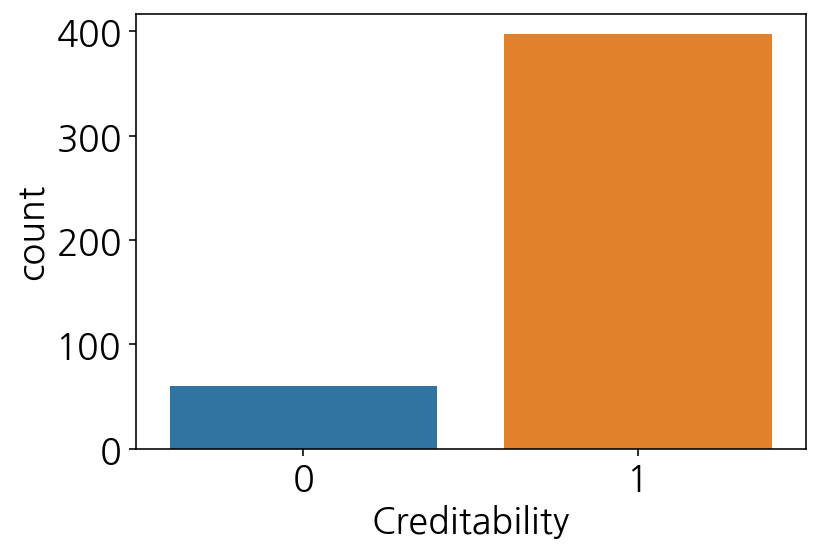

In [28]:
sns.countplot(data=temp,x=target)

In [27]:
# 은행잔고가 양호한 사람 추출
temp = data.loc[(data['AccountBalance']==3)]

In [29]:
data[target].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [30]:
temp[target].value_counts()

1    397
0     60
Name: Creditability, dtype: int64

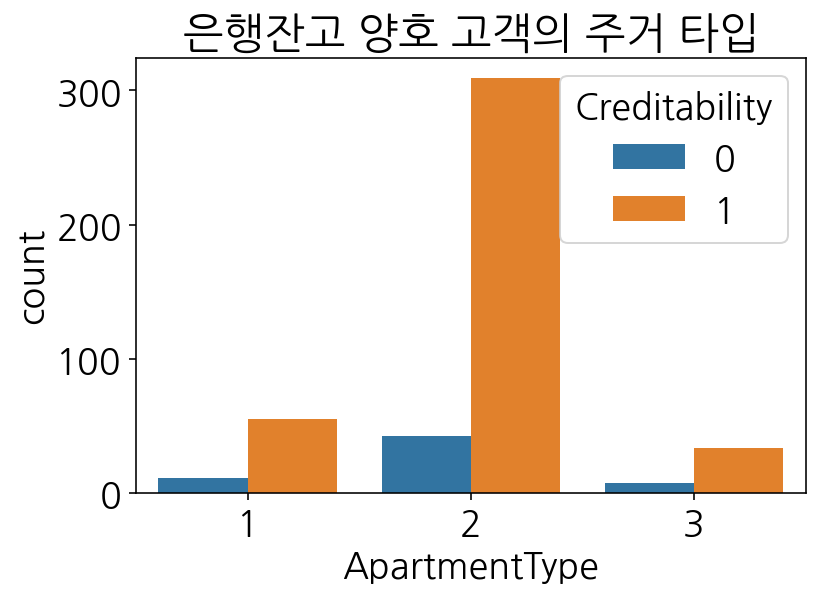

In [31]:
sns.countplot(data=temp,x='ApartmentType',hue=target)
plt.title('은행잔고 양호 고객의 주거 타입')
plt.show()

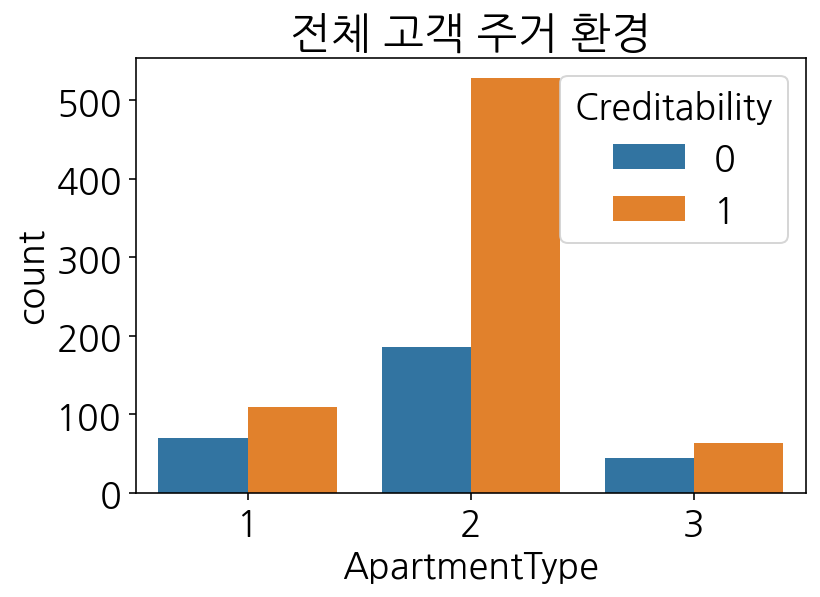

In [32]:
sns.countplot(data=data,x='ApartmentType',hue=target)
plt.title('전체 고객 주거 환경')
plt.show()

#### 비율상 '자가를 가지고있는 사람이 신용도가 좋아야하지 않나?' 라는 생각을 했었는데 비율상 안 좋아 보였음.
#### 그 이유는 하우스푸어와 같은 빚을 내서 자가를 구입한 고객이 섞여있어서 안 좋게 보였던 것.

In [33]:
# 은행잔고가 2이하 추출
temp2 = data.loc[(data['AccountBalance']<3)]

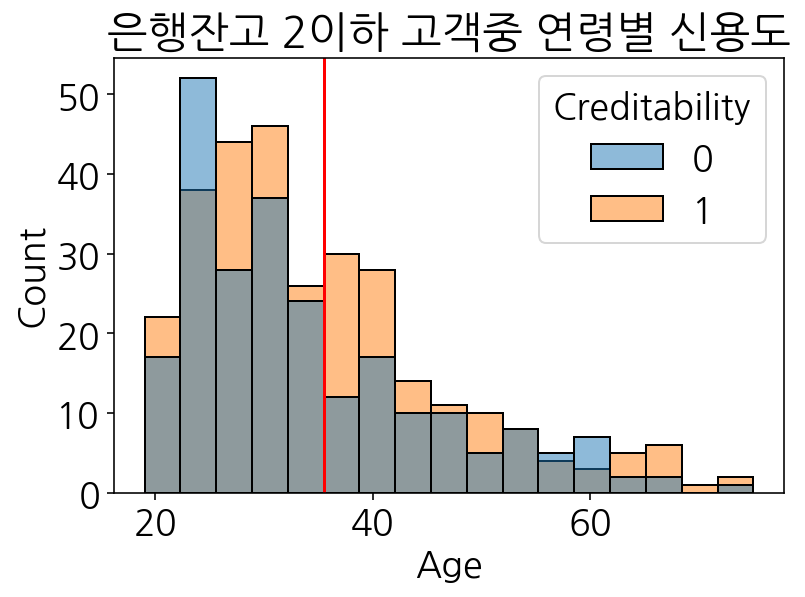

In [34]:
sns.histplot(data=temp2,x='Age',hue=target,bins=17)
plt.title('은행잔고 2이하 고객중 연령별 신용도')
plt.axvline(data['Age'].mean(),color='r')
plt.show()

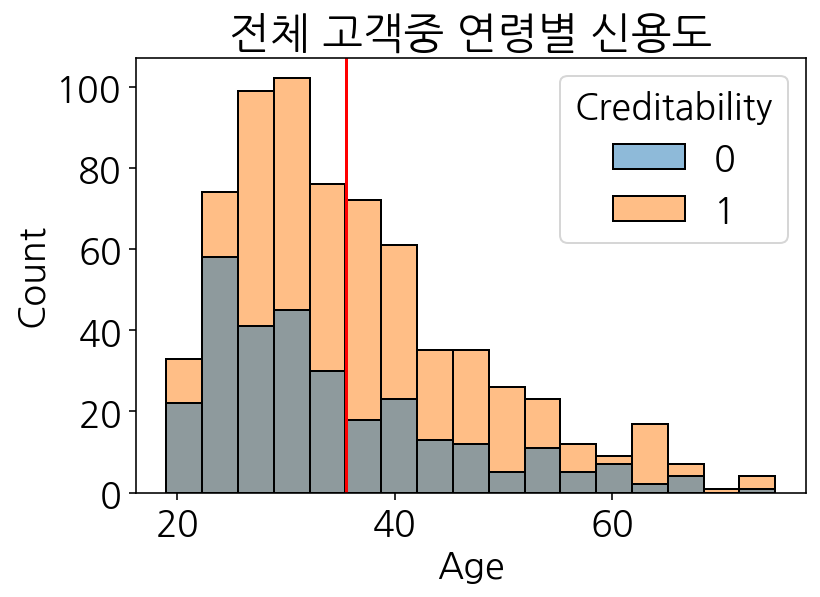

In [35]:
sns.histplot(data=data,x='Age',hue=target,bins=17)
plt.title('전체 고객중 연령별 신용도')
plt.axvline(data['Age'].mean(),color='r')
plt.show()

#### 나이가 많아질수록 경제적으로 안정됐을거라 예상해 우상향으로 예상했지만 아니였음.
#### 사회적 활동이 활발한 시기에 신용관리가 잘 되지만 활동이 줄어들수록 신용도 관리가 힘든 것을 확인 가능했음.
#### 사회인이 되는 시기 부모로부터 지원을 받지 못한 인원의 경우 초기에 신용관리가 힘들어 보이는 것을 확인 가능했음.
#### 또한 60대때에는 자녀문제로 신용불량으로 나오는 것으로 예상함.

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 결측치 처리**

- Age 변수에 대한 결측치 처리를 진행합니다.
- 데이터 양이 많지 않으니 제거 보다는 채우기를 권고합니다.

### 결측치는 Age 함수에만 있는데 평균값으로 채움.

In [36]:
data.isna().sum()

Creditability      0
AccountBalance     0
CreditDuration     0
Payment            0
Purpose            0
CreditAmount       0
Employment         0
SexMarital         0
CurrentAddress     0
MostValuable       0
Age               17
ApartmentType      0
NoCredits          0
Occupation         0
Telephone          0
ForeignWorker      0
dtype: int64

In [37]:
# 선형보간법
data['Age'].interpolate(method='linear',inplace=True)
# 확인
data['Age'].isna().sum()

0

**2) x, y 분리**

- Target을 선정하고 x, y를 분리합니다.

In [38]:
# 타겟
target = 'Creditability'
# x, y 분리
x = data.drop(target,axis=1)
y = data[target]

**3) 가변수화**

- 앞에서 범주형으로 구분한 변수에 대해 가변수화를 수행합니다.
- 참고: 이미 x, y로 분리가 되었으니 x에 대한 가변수화를 수행해야 합니다.


In [39]:
cols = ['AccountBalance','Payment','Purpose','Employment','SexMarital','CurrentAddress','MostValuable','ApartmentType','NoCredits','Occupation','Telephone']
x = pd.get_dummies(x,columns=cols,drop_first=True)


In [40]:
# 확인
x

,CreditDuration,CreditAmount,Age,ForeignWorker,AccountBalance_2,AccountBalance_3,Payment_1,Payment_2,Payment_3,Payment_4,...,MostValuable_4,ApartmentType_2,ApartmentType_3,NoCredits_2,NoCredits_3,NoCredits_4,Occupation_2,Occupation_3,Occupation_4,Telephone_2
0,24,1249,28.0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,9,276,22.0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,18,1049,21.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,24,6419,38.0,1,0,0,0,0,0,1,...,1,0,1,1,0,0,0,0,1,1
4,12,1424,55.0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1680,35.0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
996,42,7882,45.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
997,54,15945,58.0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
998,15,1537,50.0,1,1,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1


In [41]:
# # 가변수 후 상관관계 시각화
# plt.figure(figsize=(40, 40))
# sns.heatmap(data = data.corr(), annot=True, 
# fmt = '.2f', linewidths=.5, cmap='Blues')
# plt.show()

**4) 정규화**

- 앞에서 연속형으로 구분한 변수에 대해 정규화를 진행합니다.

In [42]:
cols = ['CreditDuration','CreditAmount','Age']
for v in cols:
    x[cols] = (x[cols]-x[cols].min())/(x[cols].max()-x[cols].min())


In [43]:
# 확인
x

,CreditDuration,CreditAmount,Age,ForeignWorker,AccountBalance_2,AccountBalance_3,Payment_1,Payment_2,Payment_3,Payment_4,...,MostValuable_4,ApartmentType_2,ApartmentType_3,NoCredits_2,NoCredits_3,NoCredits_4,Occupation_2,Occupation_3,Occupation_4,Telephone_2
0,0.294118,0.054969,0.160714,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.073529,0.001431,0.053571,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.205882,0.043964,0.035714,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.294118,0.339441,0.339286,1,0,0,0,0,0,1,...,1,0,1,1,0,0,0,0,1,1
4,0.117647,0.064598,0.642857,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.117647,0.078684,0.285714,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
996,0.558824,0.419941,0.464286,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
997,0.735294,0.863596,0.696429,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
998,0.161765,0.070815,0.553571,1,1,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1


**5) 학습용, 평가용 데이터 분리**


- 모델링을 위해 학습용, 평가용 데이터를 분리합니다.

In [44]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2022)


# 4.모델링

- 다음 알고리즘을 사용해 모델링을 진행합니다.
    - Logistic Regression
    - KNN
    - Decision Tree
    - Random Forest
    - XGBoost
- Classification Report를 사용해 성능을 평가합니다.
- 성능 평가 결과 아래에 성능에 대한 의견을 정리합니다.
- 혼동행렬, 변수 중요도 등을 시각화해 모델을 심도있게 탐색합니다.

## 4.1.Logistic Regression

### 4.1.1.모델링

- Logistic Regression 알고리즘을 사용해 모델링을 진행합니다.

In [45]:
# 불러오기
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix as cm,classification_report as cr

In [46]:
# 선언하기
model = LogisticRegression(max_iter=500)

In [47]:
# 학습
model.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [48]:
# 예측
y_pred = model.predict(x_test)

In [49]:
# 평가
print(cm(y_test,y_pred))
print(cr(y_test,y_pred))

[[ 50  47]
 [ 31 172]]
              precision    recall  f1-score   support

           0       0.62      0.52      0.56        97
           1       0.79      0.85      0.82       203

    accuracy                           0.74       300
   macro avg       0.70      0.68      0.69       300
weighted avg       0.73      0.74      0.73       300



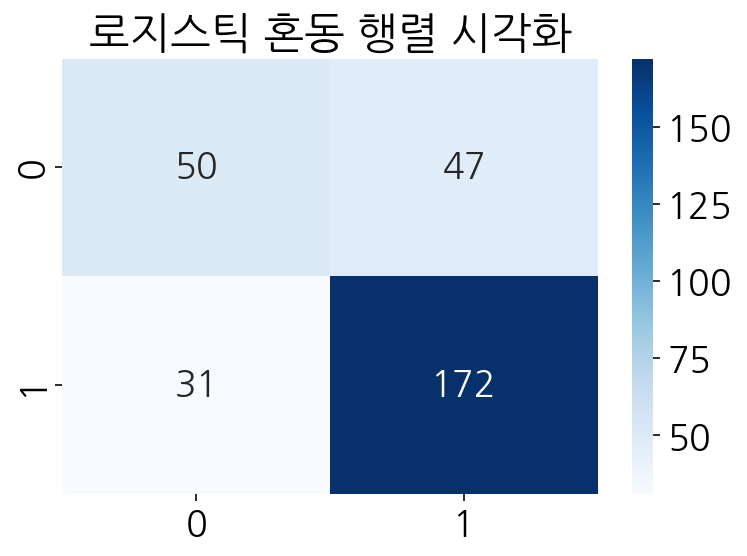

In [50]:
import seaborn as sns
sns.heatmap(cm(y_test,y_pred),annot=True,cmap='Blues',fmt='g')
plt.title('로지스틱 혼동 행렬 시각화')
plt.show()

In [51]:
print(list(x))
print(model.coef_)
print(model.intercept_)

['CreditDuration', 'CreditAmount', 'Age', 'ForeignWorker', 'AccountBalance_2', 'AccountBalance_3', 'Payment_1', 'Payment_2', 'Payment_3', 'Payment_4', 'Purpose_1', 'Purpose_2', 'Purpose_3', 'Purpose_4', 'Purpose_5', 'Purpose_6', 'Purpose_8', 'Purpose_9', 'Purpose_10', 'Employment_2', 'Employment_3', 'Employment_4', 'Employment_5', 'SexMarital_2', 'SexMarital_3', 'SexMarital_4', 'CurrentAddress_2', 'CurrentAddress_3', 'CurrentAddress_4', 'MostValuable_2', 'MostValuable_3', 'MostValuable_4', 'ApartmentType_2', 'ApartmentType_3', 'NoCredits_2', 'NoCredits_3', 'NoCredits_4', 'Occupation_2', 'Occupation_3', 'Occupation_4', 'Telephone_2']
[[-1.8739714  -0.82892006  0.88798723  0.94419374  0.63840035  1.67334921
   0.18602773  0.79464407  1.02229176  1.41959828  1.39437501  0.4901114
   0.60249648  0.11648592 -0.17243422 -0.12320386  0.55089867  0.27157364
   0.56668415 -0.80018075 -0.09125891  0.20512398 -0.12942687  0.19777144
   0.65663415  0.31300498 -0.59002871 -0.56646997 -0.31264507 -0

In [52]:
from sklearn.metrics import accuracy_score

score={}
score['Logistic'] = [accuracy_score(y_test, y_pred)]

- (의견) 정확도가 74로 나쁘지 않게 나옴.
- (의견) 하지만 샘플이 2배차이라 재현율이 좋지 않음.
- (의견)

### 4.1.2.모델 탐색(2가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 오버샘플링**

- 내용

In [53]:
# # Over Sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2022)
x_over, y_over = smote.fit_resample(x, y)

In [54]:
y_over.value_counts()

1    700
0    700
Name: Creditability, dtype: int64

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=2022)  
model = LogisticRegression(max_iter=500)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(cm(y_test,y_pred))
print(cr(y_test,y_pred))

[[166  43]
 [ 35 176]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       209
           1       0.80      0.83      0.82       211

    accuracy                           0.81       420
   macro avg       0.81      0.81      0.81       420
weighted avg       0.81      0.81      0.81       420



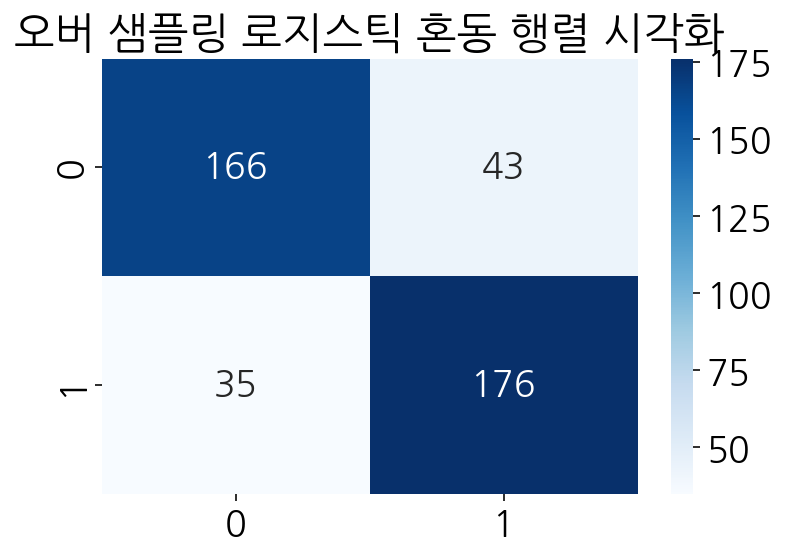

In [56]:
sns.heatmap(cm(y_test,y_pred),annot=True,cmap='Blues',fmt='g')
plt.title('오버 샘플링 로지스틱 혼동 행렬 시각화')
plt.show()

- (의견) 0.74 -> 0.81로 대폭상승.
- (의견) 정밀도, 재현율도 크게 보정됨.

**2) 언더샘플링**

- 내용

In [57]:
# Under Sampling
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=2022)
x_under, y_under = cc.fit_resample(x, y)


In [58]:
y_under.value_counts()

0    300
1    300
Name: Creditability, dtype: int64

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.3, random_state=2022)  

In [60]:

model = LogisticRegression(max_iter=500)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(cm(y_test,y_pred))
print(cr(y_test,y_pred))

[[67 26]
 [28 59]]
              precision    recall  f1-score   support

           0       0.71      0.72      0.71        93
           1       0.69      0.68      0.69        87

    accuracy                           0.70       180
   macro avg       0.70      0.70      0.70       180
weighted avg       0.70      0.70      0.70       180



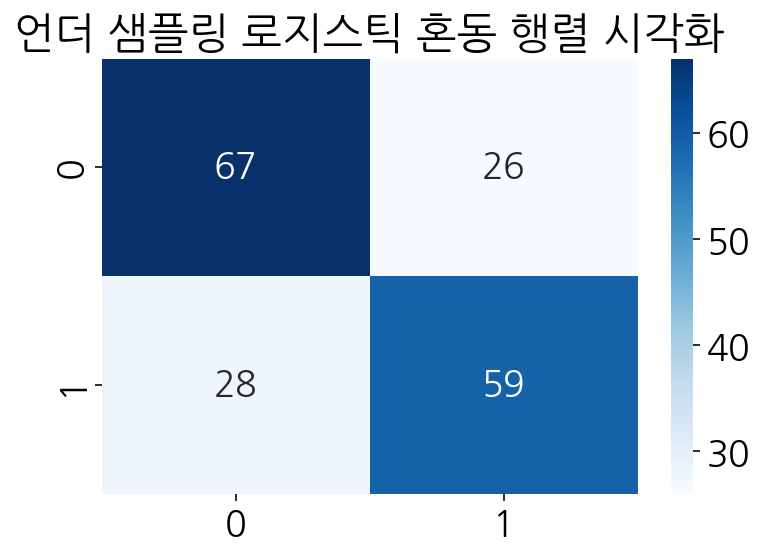

In [61]:
sns.heatmap(cm(y_test,y_pred),annot=True,cmap='Blues',fmt='g')
plt.title('언더 샘플링 로지스틱 혼동 행렬 시각화')
plt.show()

- (의견) 오히려 정확도가 낮아진 모습.
- (의견) 재현율, 정밀도부분에선 조금 완화된 모습 확인 가능.

## 4.2.Decision Tree

### 4.2.1.모델링

- Decision Tree 알고리즘을 사용해 모델링을 진행합니다.

In [62]:
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)  

In [63]:
model = DecisionTreeClassifier(random_state=2022)


In [64]:
model.fit(x_train,y_train)


DecisionTreeClassifier(random_state=2022)

In [65]:
y_pred = model.predict(x_test)


In [66]:
print(cm(y_test,y_pred))
print(cr(y_test,y_pred))

[[ 44  53]
 [ 57 146]]
              precision    recall  f1-score   support

           0       0.44      0.45      0.44        97
           1       0.73      0.72      0.73       203

    accuracy                           0.63       300
   macro avg       0.58      0.59      0.59       300
weighted avg       0.64      0.63      0.64       300



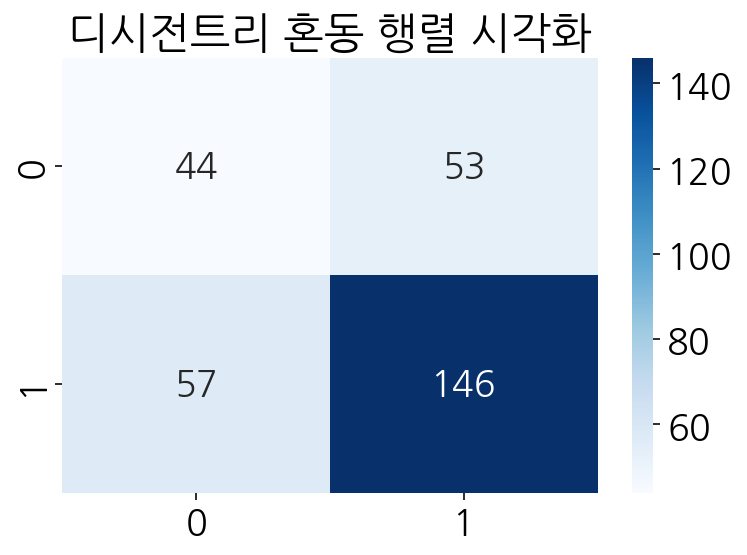

In [67]:
sns.heatmap(cm(y_test,y_pred),annot=True,cmap='Blues',fmt='g')
plt.title('디시전트리 혼동 행렬 시각화')
plt.show()

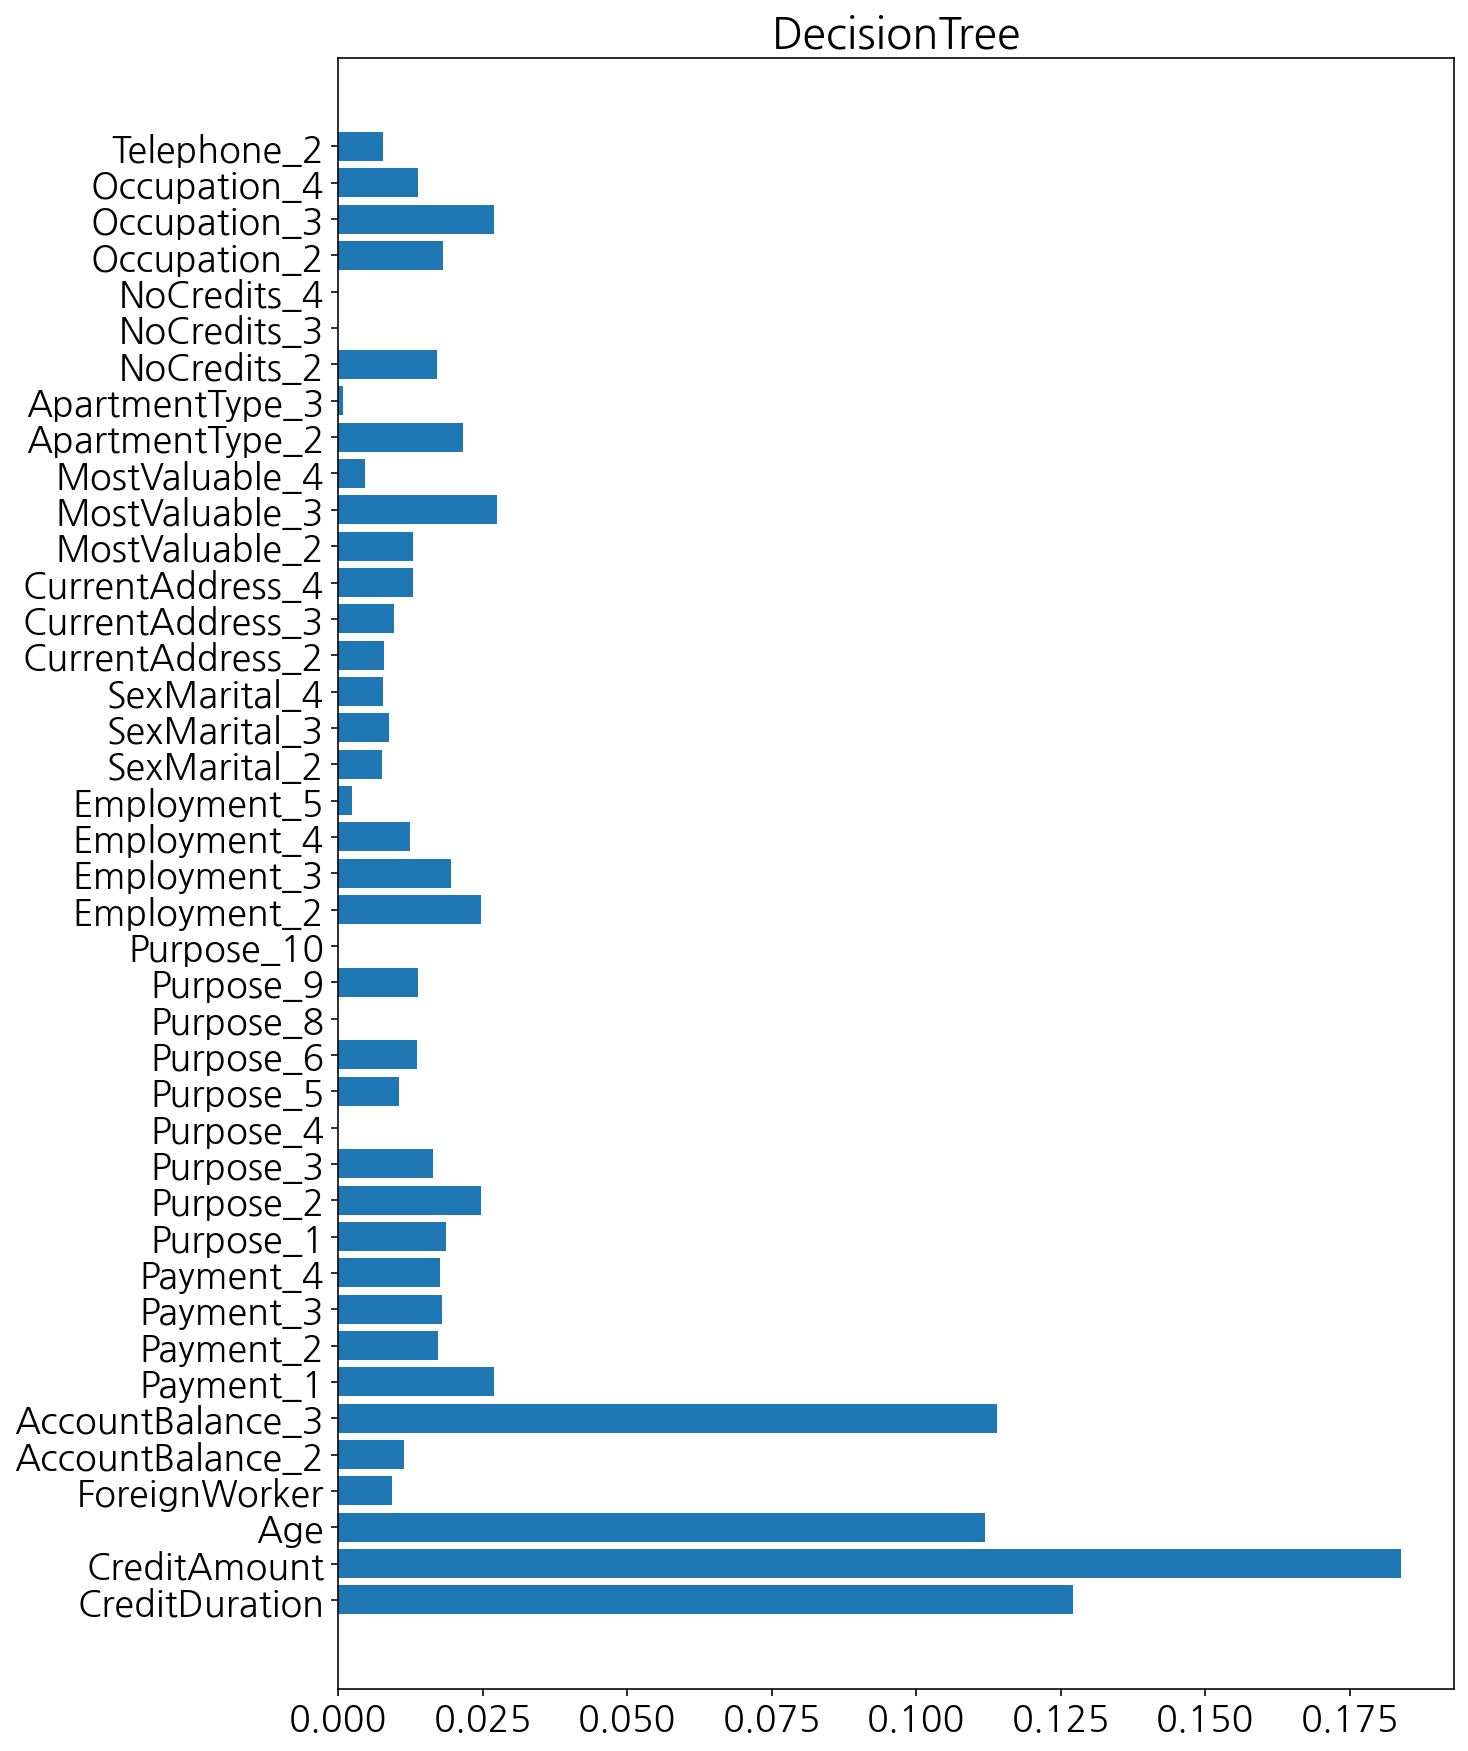

In [68]:
plt.figure(figsize=(10,15))
plt.barh(list(x),model.feature_importances_)
plt.title('DecisionTree')
plt.show()

- (의견) 정확도가 저조함.
- (의견) 튜닝 필요
- (의견) 샘플차이가 나서 재현율이 좋지 못함.
- (의견) 대출금액이 가장 큰 영향력.

In [69]:
score['DecisionTree'] = [accuracy_score(y_test, y_pred)]

### 4.2.2.모델 탐색(2가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 오버**

- 내용

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=2022)  
model = DecisionTreeClassifier(random_state=2022)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(cm(y_test,y_pred))
print(cr(y_test,y_pred))


[[164  45]
 [ 57 154]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       209
           1       0.77      0.73      0.75       211

    accuracy                           0.76       420
   macro avg       0.76      0.76      0.76       420
weighted avg       0.76      0.76      0.76       420



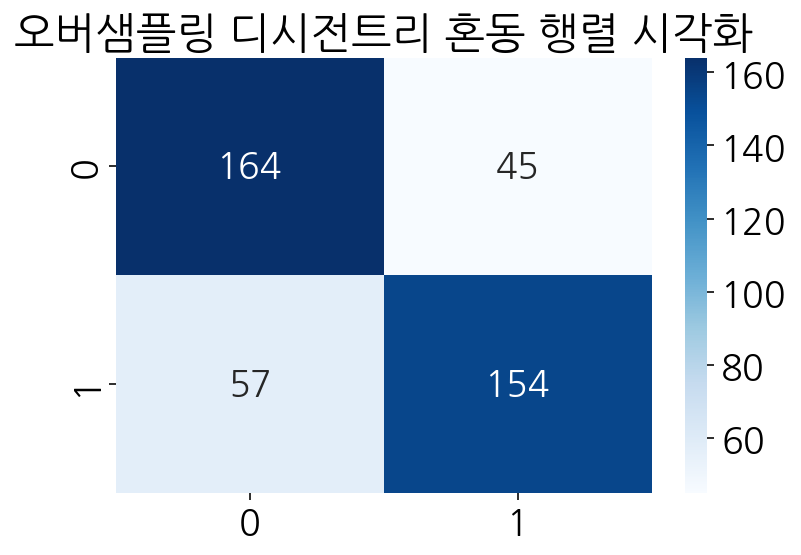

In [71]:
sns.heatmap(cm(y_test,y_pred),annot=True,cmap='Blues',fmt='g')
plt.title('오버샘플링 디시전트리 혼동 행렬 시각화')
plt.show()

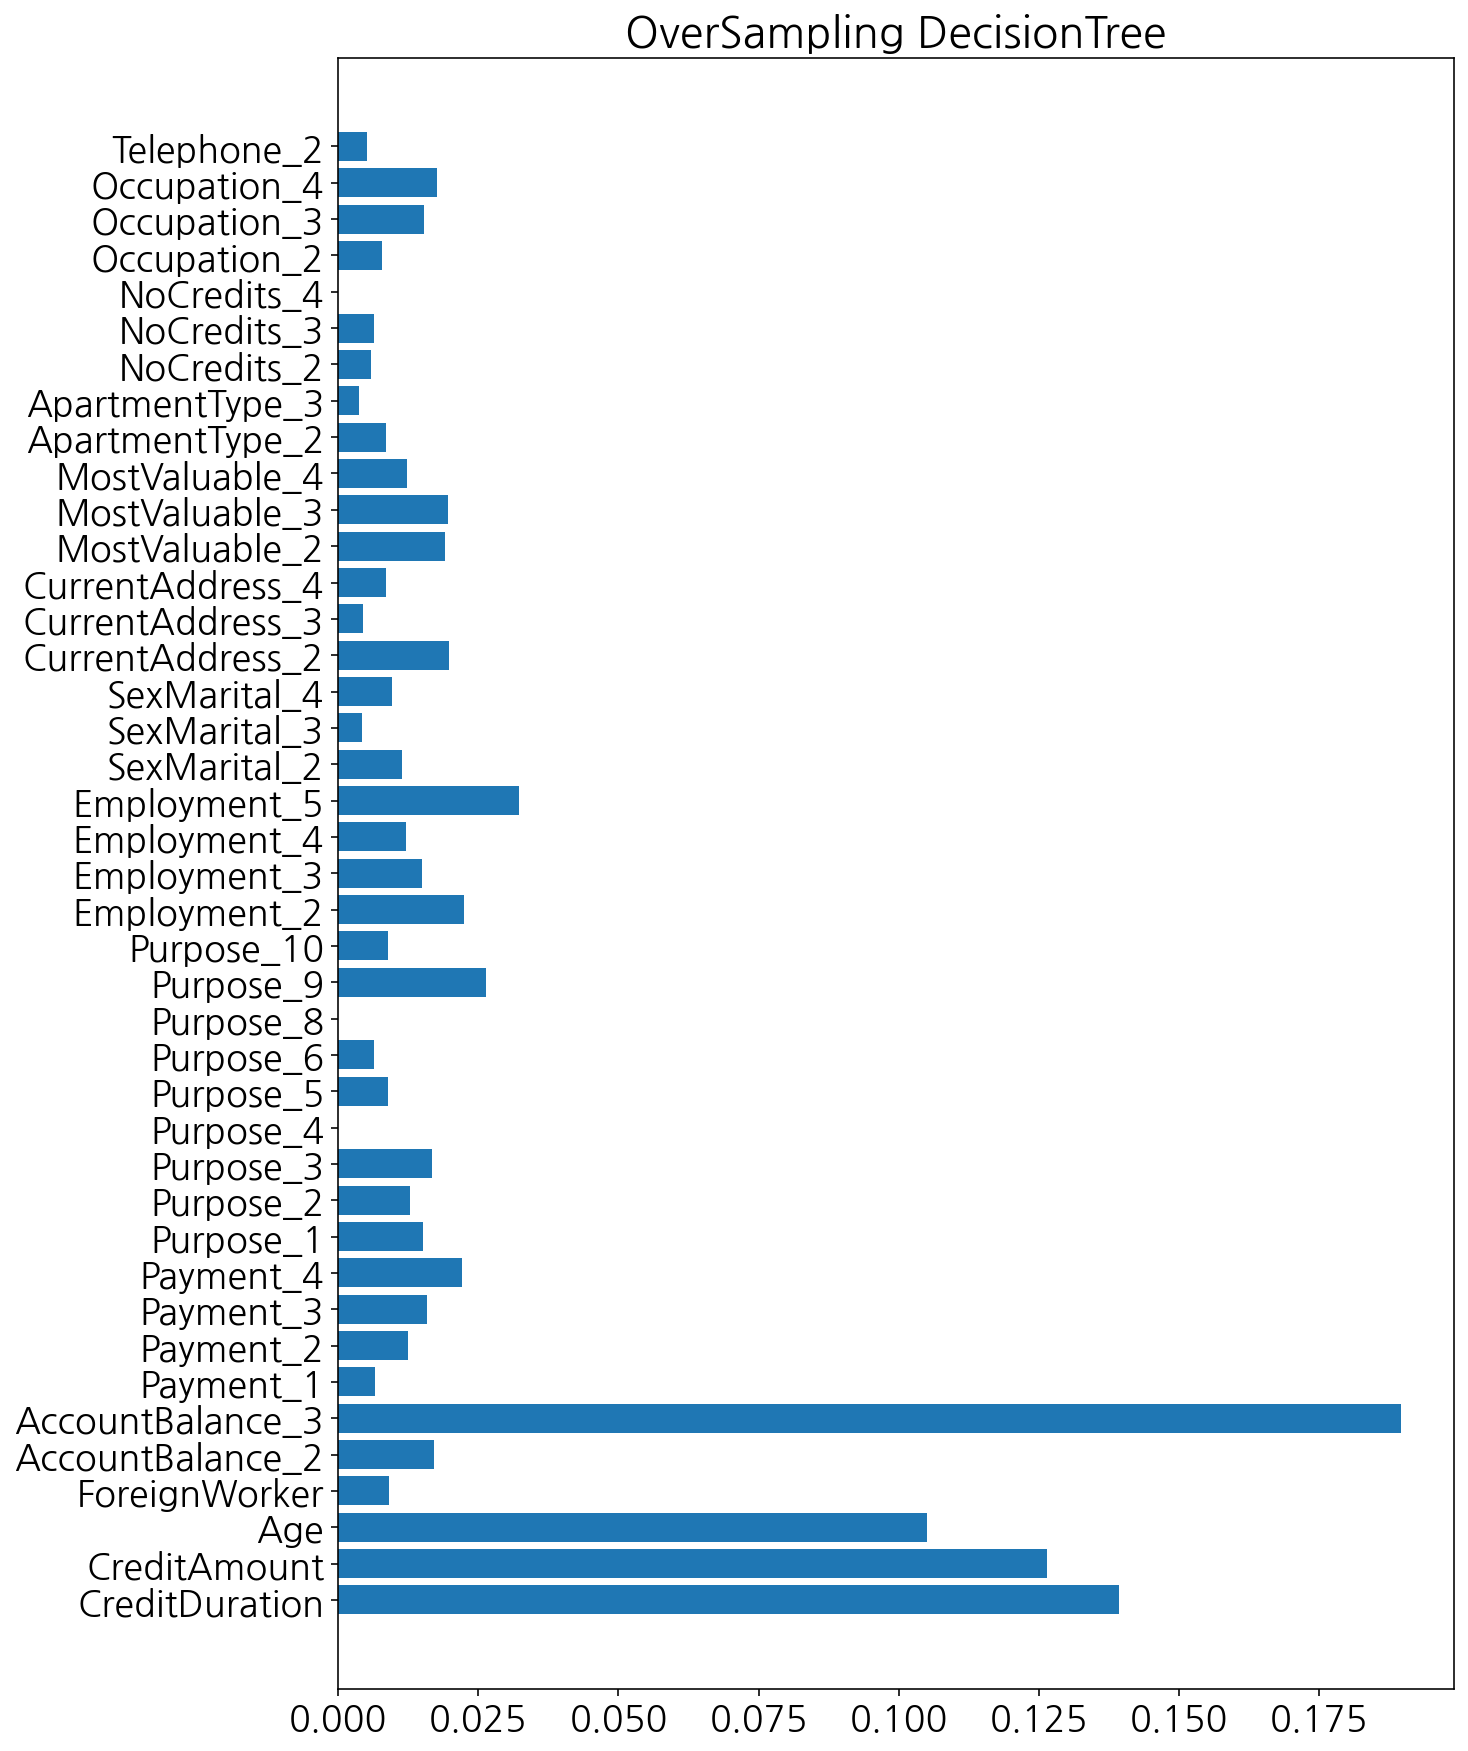

In [72]:
plt.figure(figsize=(10,15))
plt.barh(list(x),model.feature_importances_)
plt.title('OverSampling DecisionTree')
plt.show()

- (의견) 잔고가 높은 영향력을 갖게 됨.
- (의견) 대출금액은 줄긴했지만 여전히 영향력 유지중.

**2) 언더**

- 내용

In [73]:

x_train, x_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.3, random_state=2022)  
model = DecisionTreeClassifier(random_state=2022)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(cm(y_test,y_pred))
print(cr(y_test,y_pred))

[[60 33]
 [31 56]]
              precision    recall  f1-score   support

           0       0.66      0.65      0.65        93
           1       0.63      0.64      0.64        87

    accuracy                           0.64       180
   macro avg       0.64      0.64      0.64       180
weighted avg       0.64      0.64      0.64       180



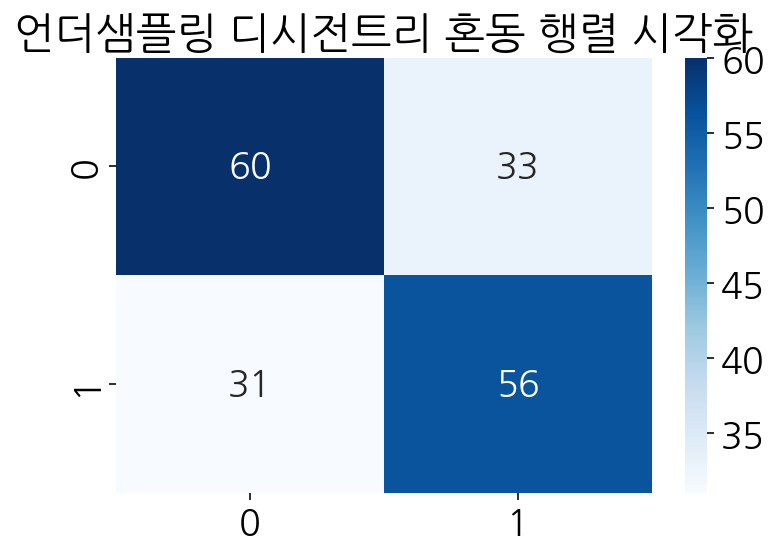

In [74]:
sns.heatmap(cm(y_test,y_pred),annot=True,cmap='Blues',fmt='g')
plt.title('언더샘플링 디시전트리 혼동 행렬 시각화')
plt.show()

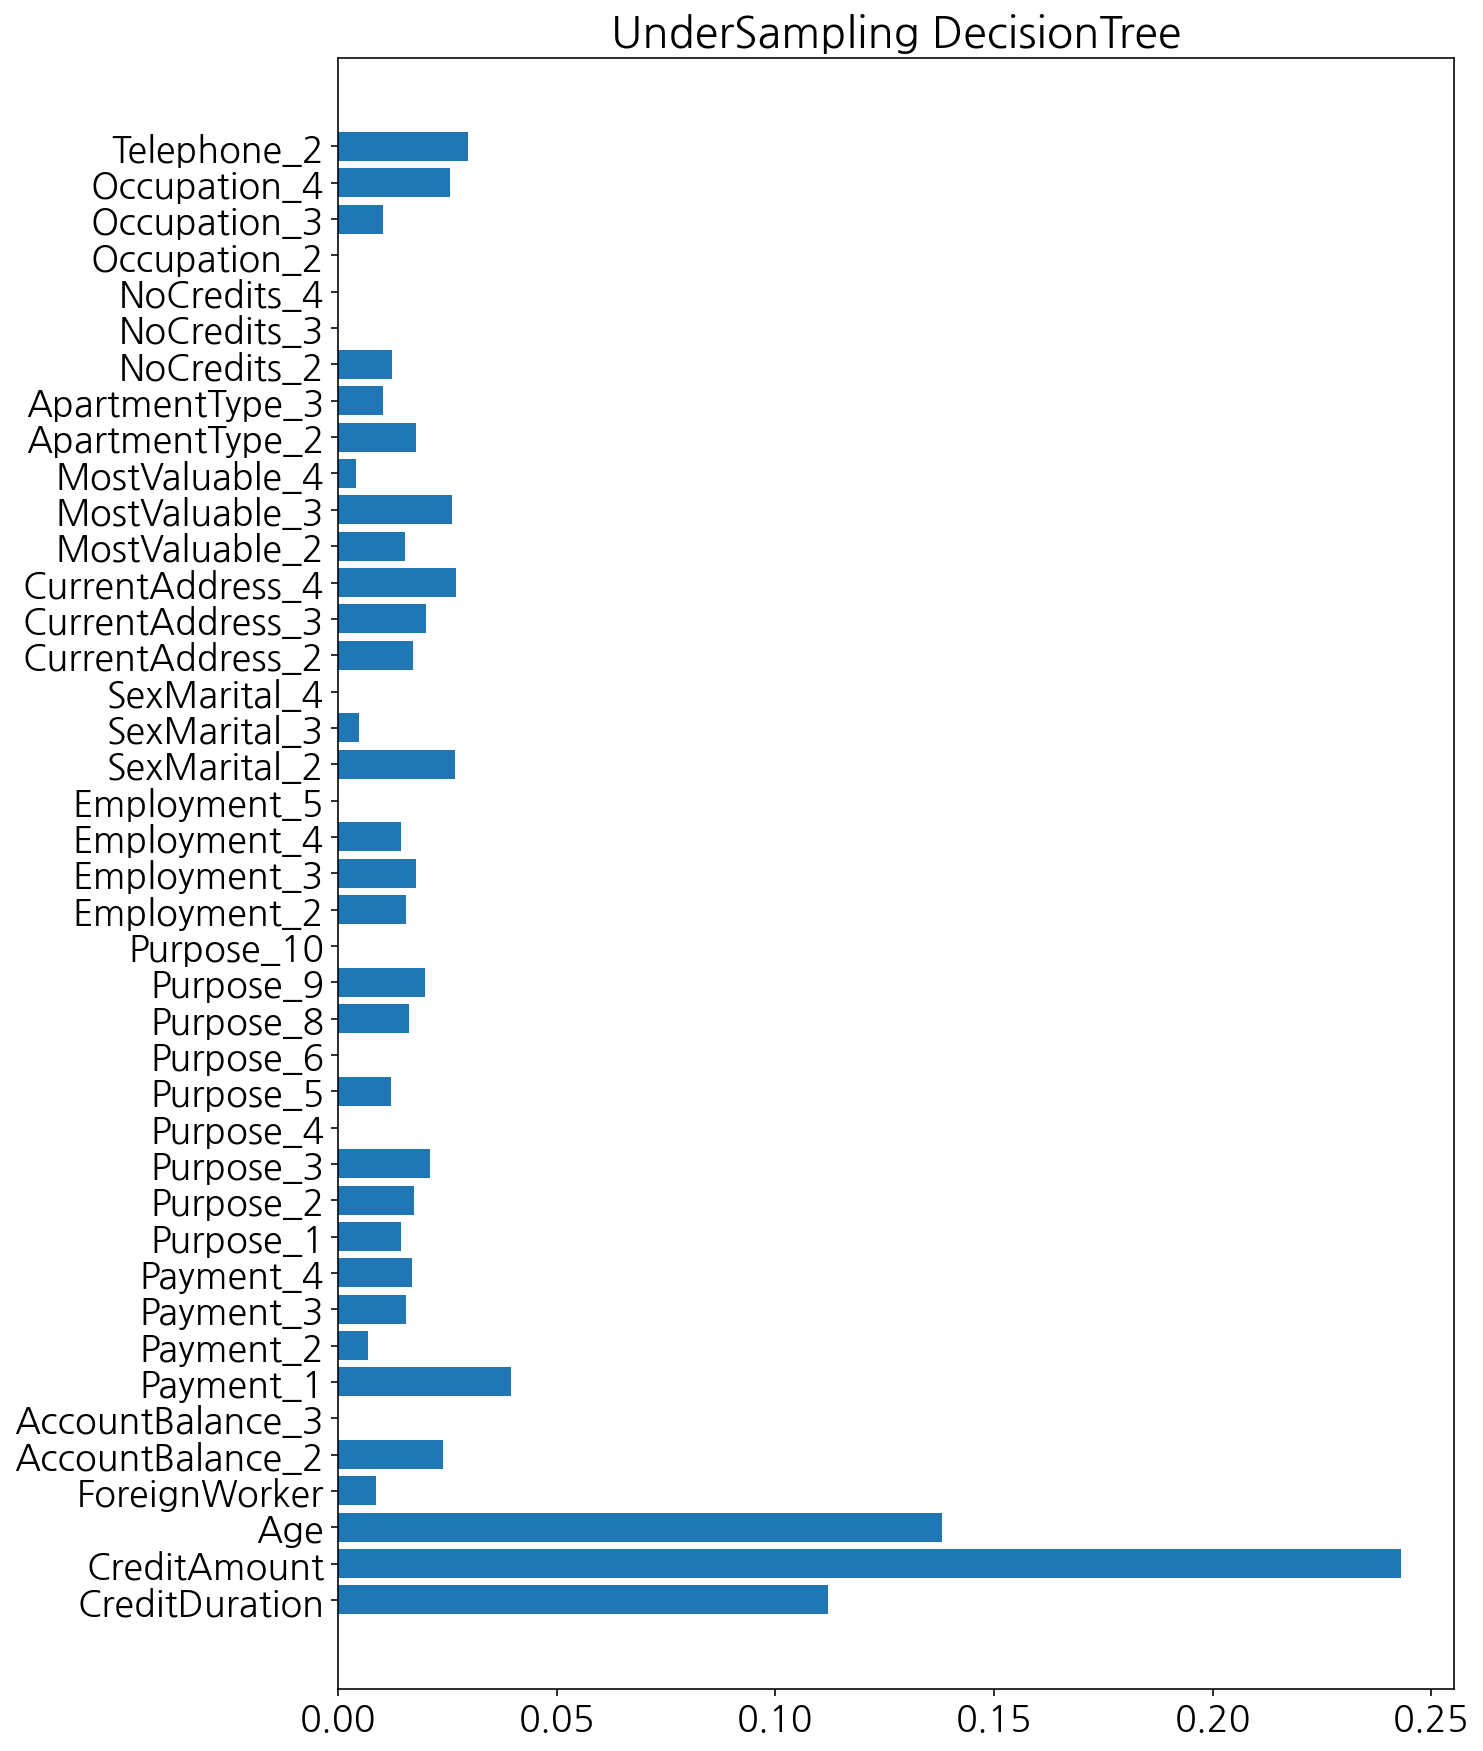

In [75]:
plt.figure(figsize=(10,15))
plt.barh(list(x),model.feature_importances_)
plt.title('UnderSampling DecisionTree')
plt.show()

- (의견) 오버샘플링과는 달리 대출 금액의 영향력이 더 커졌다.
- (의견)

## 4.3.KNN

### 4.3.1.모델링

- KNN 알고리즘을 사용해 모델링을 진행합니다.

In [76]:
from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)  

In [77]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [78]:
y_pred = model.predict(x_test)

In [79]:
print(cm(y_test,y_pred))
print(cr(y_test,y_pred))


[[ 32  65]
 [ 30 173]]
              precision    recall  f1-score   support

           0       0.52      0.33      0.40        97
           1       0.73      0.85      0.78       203

    accuracy                           0.68       300
   macro avg       0.62      0.59      0.59       300
weighted avg       0.66      0.68      0.66       300



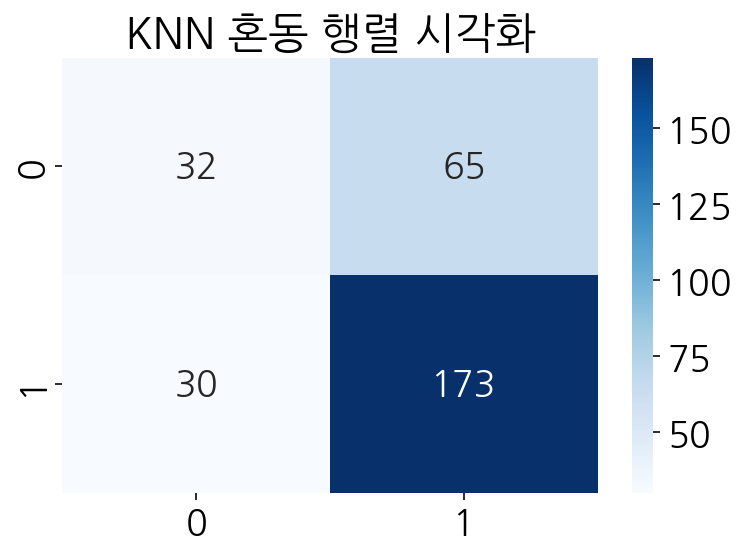

In [80]:
sns.heatmap(cm(y_test,y_pred),annot=True,cmap='Blues',fmt='g')
plt.title('KNN 혼동 행렬 시각화')
plt.show()


- (의견) 디시젼트리보단 나은 정확도를 가졌으나, 재현율은 더 떨어짐.
- (의견) 정밀도도 여전히 낮음.
- (의견)

In [81]:
score['KNN'] = [accuracy_score(y_test, y_pred)]

### 4.3.2.모델 탐색(1가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 오버**

- 내용

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=2022)  
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(cm(y_test,y_pred))
print(cr(y_test,y_pred))


[[185  24]
 [ 69 142]]
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       209
           1       0.86      0.67      0.75       211

    accuracy                           0.78       420
   macro avg       0.79      0.78      0.78       420
weighted avg       0.79      0.78      0.78       420



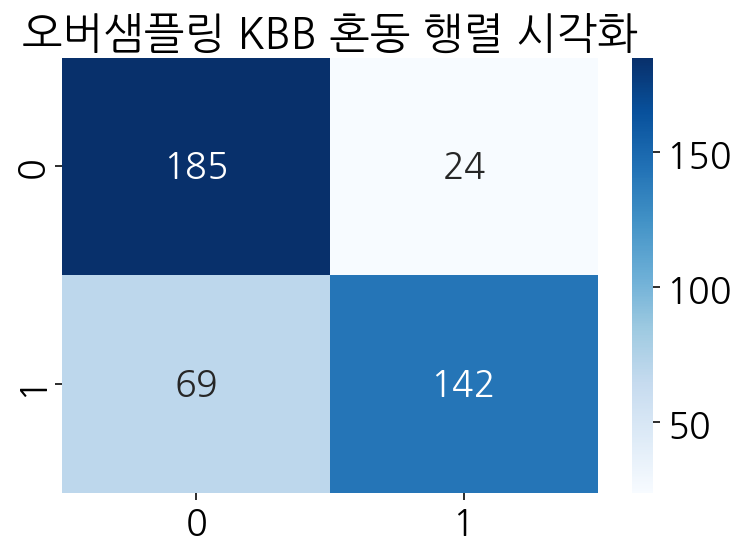

In [83]:
sns.heatmap(cm(y_test,y_pred),annot=True,cmap='Blues',fmt='g')
plt.title('오버샘플링 KBB 혼동 행렬 시각화')
plt.show()

- (의견) 정확도, 재현율이 상당히 좋아짐.
- (의견) 하지만 오버샘플링의 한계

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.3, random_state=2022)  
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(cm(y_test,y_pred))
print(cr(y_test,y_pred))


[[52 41]
 [28 59]]
              precision    recall  f1-score   support

           0       0.65      0.56      0.60        93
           1       0.59      0.68      0.63        87

    accuracy                           0.62       180
   macro avg       0.62      0.62      0.62       180
weighted avg       0.62      0.62      0.62       180



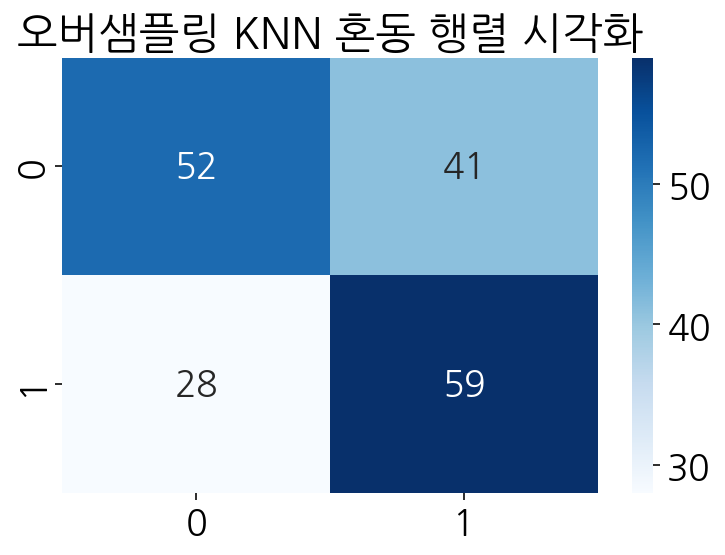

In [85]:
sns.heatmap(cm(y_test,y_pred),annot=True,cmap='Blues',fmt='g')
plt.title('오버샘플링 KNN 혼동 행렬 시각화')
plt.show()

## 4.4.Random Forest

### 4.4.1.모델링

- Random Forest 알고리즘을 사용해 모델링을 진행합니다.

In [86]:
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)  


In [87]:
model = RandomForestClassifier(random_state=2022)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=2022)

In [88]:
y_pred=model.predict(x_test)
print(cm(y_test,y_pred))
print(cr(y_test,y_pred))

[[ 40  57]
 [ 28 175]]
              precision    recall  f1-score   support

           0       0.59      0.41      0.48        97
           1       0.75      0.86      0.80       203

    accuracy                           0.72       300
   macro avg       0.67      0.64      0.64       300
weighted avg       0.70      0.72      0.70       300



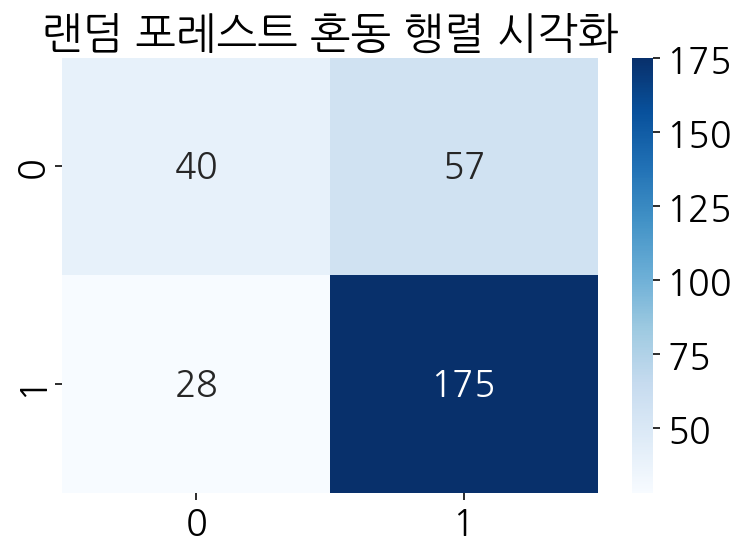

In [89]:
sns.heatmap(cm(y_test,y_pred),annot=True,cmap='Blues',fmt='g')
plt.title('랜덤 포레스트 혼동 행렬 시각화')
plt.show()


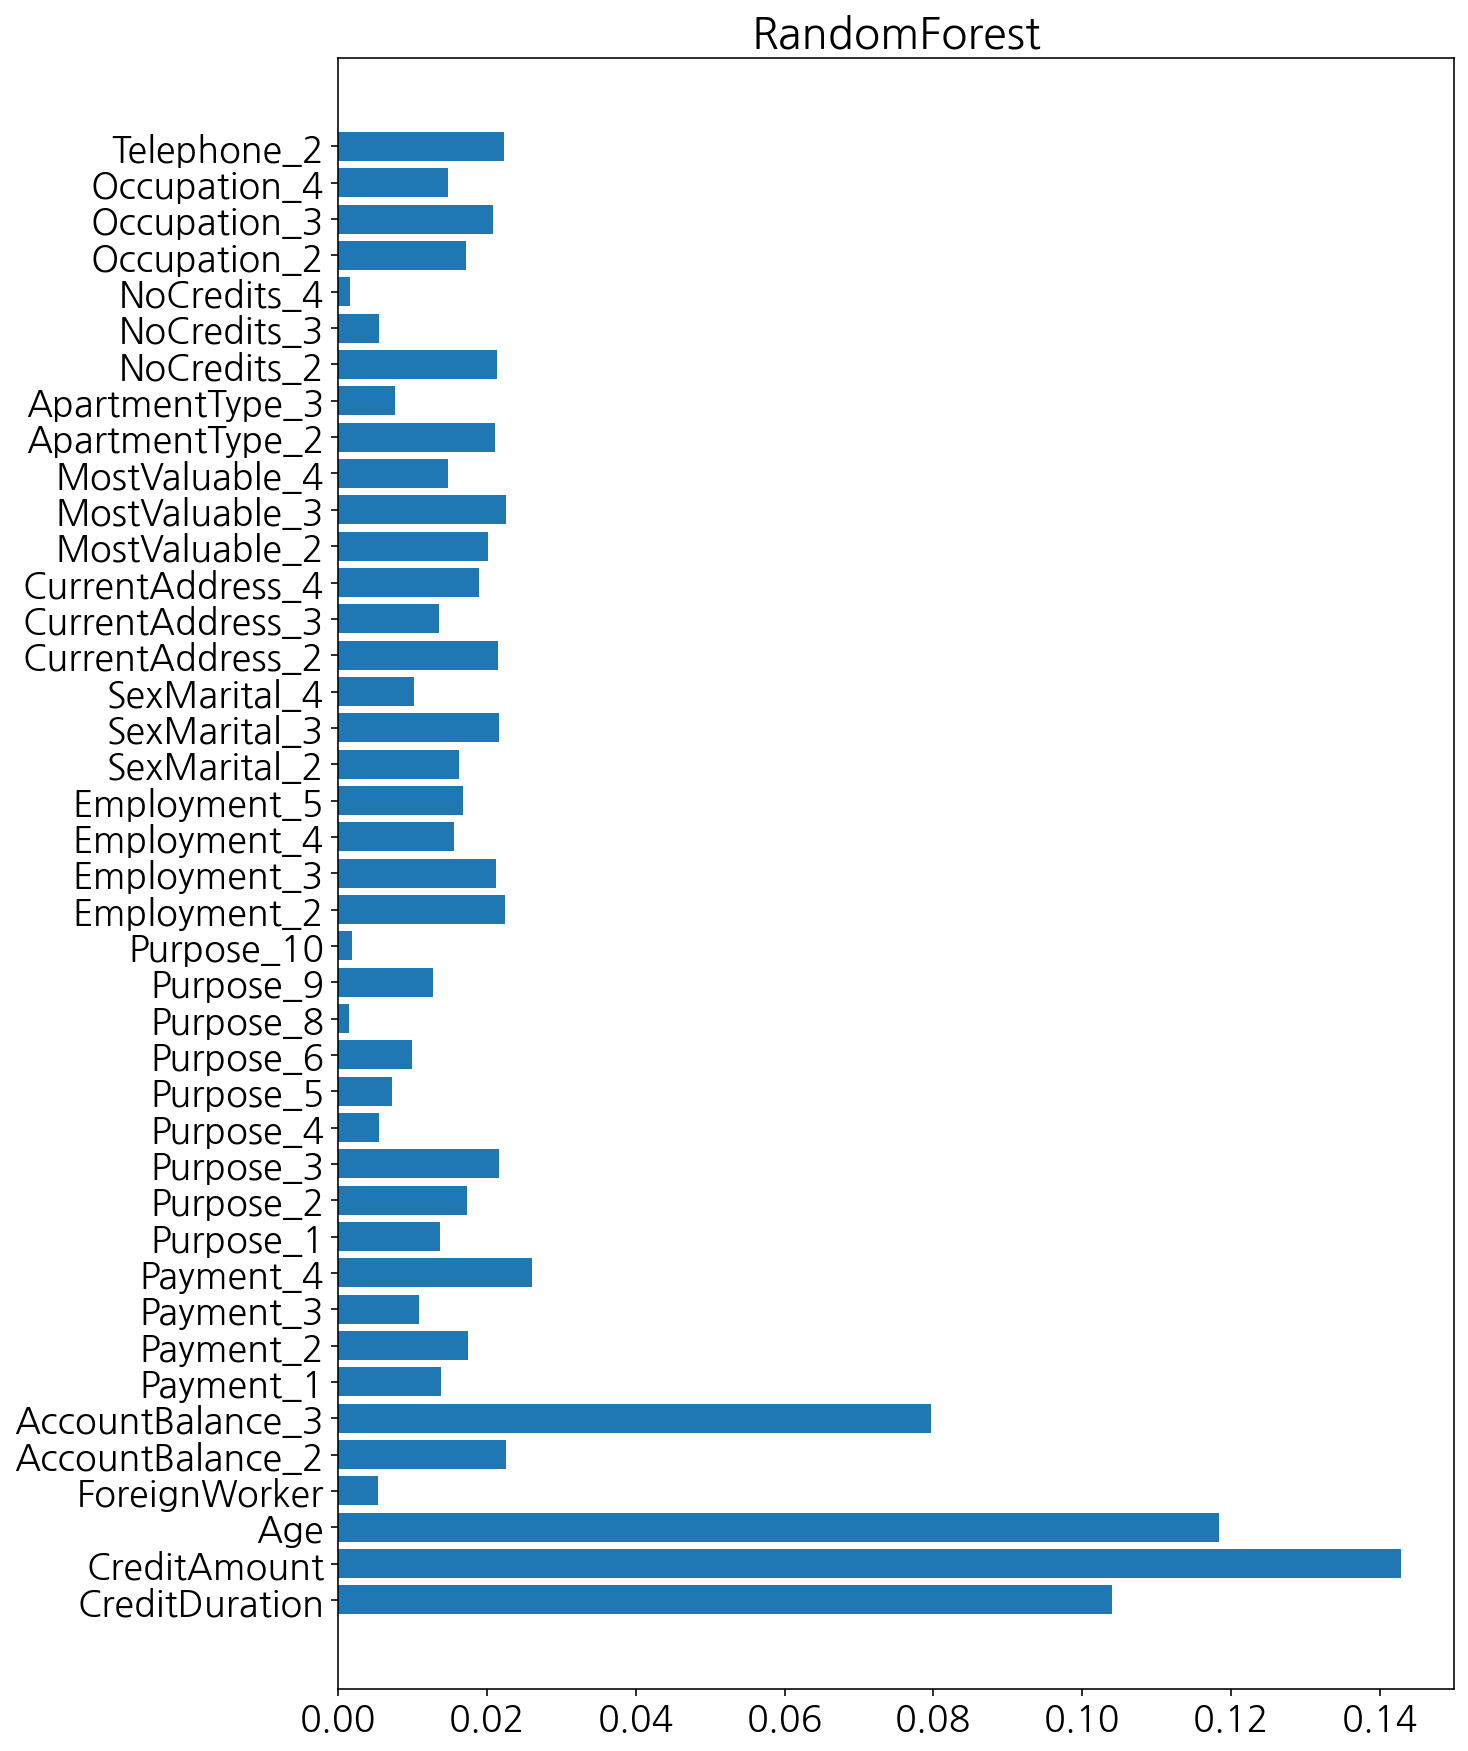

In [90]:
plt.figure(figsize=(10,15))
plt.barh(list(x),model.feature_importances_)
plt.title('RandomForest')
plt.show()


- (의견) 정확도는 나쁘지 않았지만, 불균형으로인해 재현율이 저조한 모습.
- (의견) 새로운 변수 Age를 랜덤포레스트는 좋게 잡아줬다.
- (의견)

In [91]:
score['RandomForest'] = [accuracy_score(y_test, y_pred)]

### 4.4.2.모델 탐색(2가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 오버**

- 내용

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=2022)  
model = DecisionTreeClassifier(random_state=2022)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(cm(y_test,y_pred))
print(cr(y_test,y_pred))


[[164  45]
 [ 57 154]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       209
           1       0.77      0.73      0.75       211

    accuracy                           0.76       420
   macro avg       0.76      0.76      0.76       420
weighted avg       0.76      0.76      0.76       420



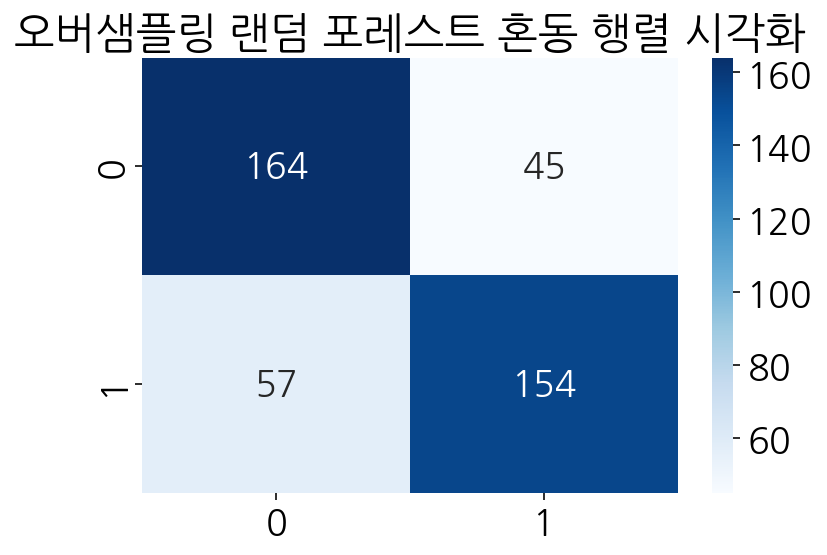

In [93]:
sns.heatmap(cm(y_test,y_pred),annot=True,cmap='Blues',fmt='g')
plt.title('오버샘플링 랜덤 포레스트 혼동 행렬 시각화')
plt.show()


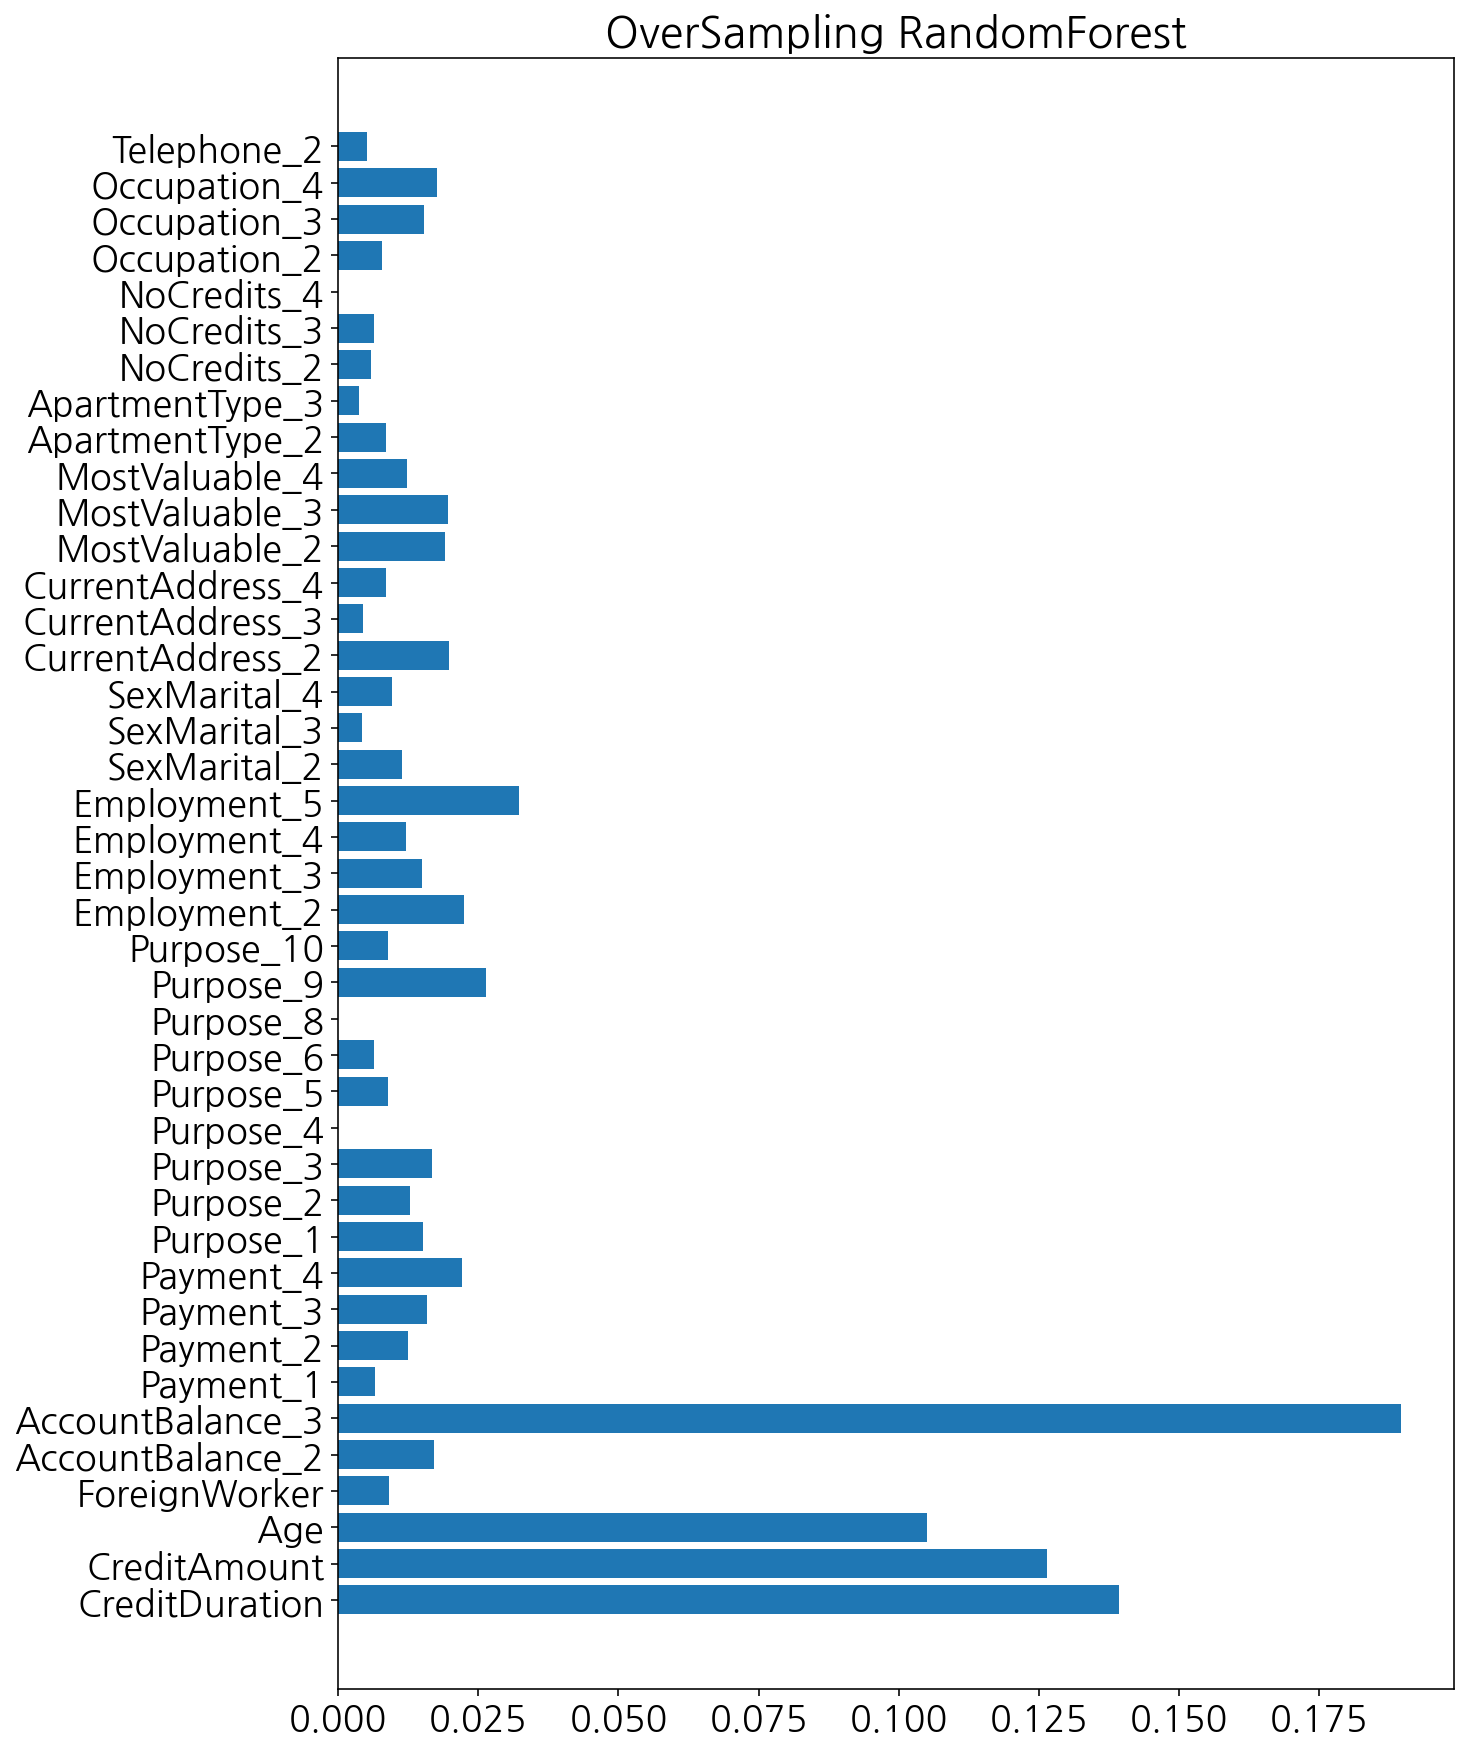

In [94]:
plt.figure(figsize=(10,15))
plt.barh(list(x),model.feature_importances_)
plt.title('OverSampling RandomForest')
plt.show()


- (의견) 은행잔고 상태가 좋을수록 영향이 크다고 잡음.
- (의견) 그 뒤로는 대출기간 > 금액 > 나이 순서.

**2) 언더**

- 내용

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.3, random_state=2022)  
model = DecisionTreeClassifier(random_state=2022)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(cm(y_test,y_pred))
print(cr(y_test,y_pred))


[[60 33]
 [31 56]]
              precision    recall  f1-score   support

           0       0.66      0.65      0.65        93
           1       0.63      0.64      0.64        87

    accuracy                           0.64       180
   macro avg       0.64      0.64      0.64       180
weighted avg       0.64      0.64      0.64       180



In [ ]:
sns.heatmap(cm(y_test,y_pred),annot=True,cmap='Blues',fmt='g')
plt.title('언더샘플링 랜덤 포레스트 혼동 행렬 시각화')
plt.show()


In [ ]:
plt.figure(figsize=(10,15))
plt.barh(list(x),model.feature_importances_)
plt.title('UnderSampling RandomForest')
plt.show()


- (의견) 노샘플링과 비슷하지만 대출금액의 비중이 높아짐.
- (의견) 오버샘플링에서는 잔고에 큰 영향력이 있었는데 언더샘플링에서는 오히려 없음.

## 4.5.XGBoost

### 4.5.1.모델링

- XGBoost 알고리즘을 사용해 모델링을 진행합니다.

In [ ]:

from xgboost import XGBClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)  


In [ ]:

model = XGBClassifier(random_state=2022)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(cm(y_test,y_pred))
print(cr(y_test,y_pred))



In [ ]:

sns.heatmap(cm(y_test,y_pred),annot=True,cmap='Blues',fmt='g')
plt.title('XGBoost 혼동 행렬 시각화')
plt.show()

In [ ]:
plt.figure(figsize=(10,15))
plt.barh(list(x),model.feature_importances_)
plt.title('XGBoost')
plt.show()


- (의견) 오버샘플링했던 랜덤 포레스트처럼 은행 잔고에 큰 영향력을 책정한 모습.
- (의견) 괜찮은 정확도, 저조한 재현율
- (의견) 기존엔 대출 금액에 많은 영향력이 나왔는데 XGB는 미미한 수준이라 예상.

In [ ]:
score['XGBoost'] = [accuracy_score(y_test, y_pred)]

### 4.5.2.모델 탐색(2가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 오버**

- 내용

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=2022)  
model = XGBClassifier(random_state=2022)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(cm(y_test,y_pred))
print(cr(y_test,y_pred))



In [ ]:
sns.heatmap(cm(y_test,y_pred),annot=True,cmap='Blues',fmt='g')
plt.title('오버샘플링 XGBoost 혼동 행렬 시각화')
plt.show()

In [ ]:
plt.figure(figsize=(10,15))
plt.barh(list(x),model.feature_importances_,)
plt.title('OverSampling XGBoost')
plt.show()

- (의견) 은행잔고의 영향력이 2배로 뛴 모습.
- (의견) 정확도 상승

**2) 언더**

- 내용

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.3, random_state=2022)  
model = XGBClassifier(random_state=2022)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(cm(y_test,y_pred))
print(cr(y_test,y_pred))



In [ ]:
sns.heatmap(cm(y_test,y_pred),annot=True,cmap='Blues',fmt='g')
plt.title('언더샘플링 XGBoost 혼동 행렬 시각화')
plt.show()

In [ ]:
plt.figure(figsize=(10,15))
plt.barh(list(x),model.feature_importances_)
plt.title('UnderSampling XGBoost')
plt.show()

- (의견) 기존 자료에선 은행잔고에 높은 영향력을 줬는데 과거 대출이력으로 바뀐모습.
- (의견) 하지만 전체적으로 0.1미만이라 평가하기 힘듬

In [ ]:
# 성능 비교
tmp = pd.DataFrame.from_dict(score, orient='index', columns=['Accuracy'])
tmp.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title('Test', size=20, pad=20)
plt.xlabel('Model')
plt.ylabel('Performance')
plt.show()

# 5.모델 성능 비교 및 정리

- (의견) 대체적으로 대출기한이 가장 큰 중요도를 가지고 있다고 판단 가능.
- (의견) 대출 금액과 연결되는 대출기한도 중요도가 어느정도 책정되는 모습.
- (의견) 은행 잔고 상태는 중요도가 들쭉날쭉해 참고하기 어려워보임.
- (의견) 불균형으로 인해 오버/언더 샘플링을 이용해야함.
- (의견) 오버/언더 샘플링으로인해 자료의 신빙성에 의문부호

# 6.성능 튜닝(1개 이상)

- 특정 알고리즘의 모델을 튜닝 대상으로 정하고 나름의 방법으로 모델 성능을 높여봅니다.

## 6.1.랜덤 튜닝

### 6.1.1.랜덤포레스트 튜닝

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)  

In [ ]:
param = {'max_depth':range(1,51),'n_estimators': range(1,51)}


In [ ]:
model_rf = RandomForestClassifier(random_state=2022)


In [ ]:
model=RandomizedSearchCV(model_rf,param,cv=5,n_iter=30,scoring='accuracy')


In [ ]:
model.fit(x_train,y_train)


In [ ]:
print(model.best_params_)
print(model.best_score_)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(cm(y_test,y_pred))
print(cr(y_test,y_pred))

In [ ]:
sns.heatmap(cm(y_test,y_pred),annot=True,cmap='Blues',fmt='g')
plt.title('튜닝 랜덤포레스트 혼동 행렬 시각화')
plt.show()

In [ ]:
# # 시각화
tmp = pd.DataFrame()
tmp['depth'] = model.cv_results_['param_max_depth'].data
tmp['score'] = model.cv_results_['mean_test_score']
tmp.sort_values(by='depth',ascending=True,inplace=True)
print('최적 깊이 :',model.best_params_['max_depth']) 
print('최고 성능 :',model.best_score_)

plt.figure(figsize=(10,5))
plt.plot(tmp['depth'],tmp['score'])
plt.axvline(model.best_params_['max_depth'],color='r')
plt.show()

- (의견) 기존 랜덤포레스트보다 재현율(.41), 정밀도(.59)가 나아짐.
- (의견) 나아진 지표를 통해 정확도가 0.72 -> 0.74로 상승.

In [ ]:
score['Tuning_RF'] = [accuracy_score(y_test, y_pred)]

### 6.1.2.튜닝 결과

- (의견) 불균형으로 인해 낮아진 정밀, 재현율을 보충할 수단이 필요함.
- (의견) 우리가 배웠던 오버, 언더 샘플링은 결과를 손댄다는 한계로 인해 신뢰하기 어려움.
- (의견) 새로운 방법이 필요해보임.
- (의견) 튜닝 결과 자체는 만족스럽게 나왔지만, 낮은 정밀/재현도에 대해 생각해봐야함.
- (의견) 최적 깊이는 43, 최고 성능은 0.75가 나왔다.

## 6.2.오버샘플링 랜덤포레스트 랜덤 튜닝

### 6.2.1.튜닝

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=2022)  
model = RandomForestClassifier(random_state=2022)


In [ ]:

param = {'max_depth':range(1,51),'n_estimators': range(1,51)}

In [ ]:
model_rf = RandomForestClassifier(random_state=2022)


In [ ]:
model=RandomizedSearchCV(model_rf,param,cv=5,n_iter=30,scoring='accuracy')


In [ ]:
model.fit(x_train,y_train)


In [ ]:
print(model.best_params_)
print(model.best_score_)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(cm(y_test,y_pred))
print(cr(y_test,y_pred))

In [ ]:
sns.heatmap(cm(y_test,y_pred),annot=True,cmap='Blues',fmt='g')
plt.title('오버 샘플링 튜닝 랜덤포레스트 혼동 행렬 시각화')
plt.show()

In [ ]:
# # 시각화
tmp = pd.DataFrame()
tmp['depth'] = model.cv_results_['param_max_depth'].data
tmp['score'] = model.cv_results_['mean_test_score']
tmp.sort_values(by='depth',ascending=True,inplace=True)
print('최적 깊이 :',model.best_params_['max_depth']) 
print('최고 성능 :',model.best_score_)

plt.figure(figsize=(10,5))
plt.plot(tmp['depth'],tmp['score'])
plt.axvline(model.best_params_['max_depth'],color='r')
plt.show()

In [ ]:
score['Over_Tuning_RF'] = [accuracy_score(y_test, y_pred)]

- (의견) 상당히 개선된 정밀, 재현율.
- (의견) 0.72(기존) => 0.74(기존 튜닝) => 0.83으로 상당히 개선된 정확도.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.3, random_state=2022)  
model = RandomForestClassifier(random_state=2022)


In [ ]:
param = {'n_estimators': range(1,51)}

# param = {'max_depth':range(1,51),'n_estimators': range(1,51)}

In [ ]:
model_rf = RandomForestClassifier(random_state=2022)


In [ ]:
model.fit(x_train,y_train)


In [ ]:
print(model.best_score_)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(cm(y_test,y_pred))
print(cr(y_test,y_pred))

In [ ]:
sns.heatmap(cm(y_test,y_pred),annot=True,cmap='Blues',fmt='g')
plt.title('언더 샘플링 튜닝 랜덤포레스트 혼동 행렬 시각화')
plt.show()

In [ ]:
# # 시각화
tmp = pd.DataFrame()
tmp['depth'] = model.cv_results_['param_max_depth'].data
tmp['score'] = model.cv_results_['mean_test_score']
tmp.sort_values(by='depth',ascending=True,inplace=True)
print('최적 깊이 :',model.best_params_['max_depth']) 
print('최고 성능 :',model.best_score_)

plt.figure(figsize=(10,5))
plt.plot(tmp['depth'],tmp['score'])
plt.axvline(model.best_params_['max_depth'],color='r')
plt.show()

### 6.2.2.튜닝 결과

- (의견) 오버튜닝의 경우 샘플이 많아져 전체적으로 괜찮아보인다.
- (의견) 하지만 우리가 사용하는 오버샘플링의 경우 y값을 손댔기 때문에 참고용으로밖에 사용할 수 없다.
- (의견) 최적 깊이는 5, 최고 성능은 0.80이 나왔다.
- (의견)
- (의견)

In [ ]:
# 성능 비교
tmp = pd.DataFrame.from_dict(score, orient='index', columns=['Accuracy'])
tmp.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title('Test', size=20, pad=20)
plt.xlabel('Model')
plt.ylabel('Performance')
plt.show()

# 7.종합 정리

- (의견) 오버/언더 샘플링의 경우 결과값을 손댔기 때문에 사용할 수 없는 자료임.
- (의견) 불균형 데이터의 경우 우리는 오버/언더 샘플링밖에 배우지 못했기에 새로운 지식이 필요해보임.
- (의견) 랜덤포레스트 모델링 결과 대출금액, 나이, 대출기간, 잔고상태의 영향을 높게 책정함.
- (의견) 오버샘플링이 샘플의 수가 많다보니 모델링 결과가 좋게 나오는데 통계의 함정에 빠질 것 같음.
- (의견) 모델링 이전 잔고상태가 가장 높은 상관관계였고 모델링, 튜닝 과정에서도 비슷하게 나온걸로 보아
- (의견) 신용도 유지는 은행 잔고 상태로 예상 가능함.
- (의견) 은행 잔고 상태가 좋은 사람의 신용도는 397명으로 과반수를 차지함.
- (의견) 아파트 주거환경 중 자신의 집의 신용불량 비율이 높아서 추가 조사한 결과 잔고 상태가 좋은 사람은 신용도가 좋고
- (의견) 잔고 상태가 좋지 못한 고객으로 인해 안 좋게 보였음.
- (의견) 연령대의 경우 사회적으로 자리잡는 20대 후반~40대 중반까지는 높은 신용도 유지가 가능했지만 그 이후부터는 조금씩 줄어듦.
- (의견) 잔고 상태가 좋지 못한 고객의 경우 자리잡지 못한 20대 초반에는 신용도가 나쁘게 나옴.